In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import scipy as sp
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

import warnings
warnings.simplefilter("ignore")
plt.style.use('fivethirtyeight')

In [2]:
def filter_dunder(any_obj):
    temp_list = dir(any_obj)
    date_obj_meth_attr = []
    for i in temp_list:
        if i[0:2] != '__':
            date_obj_meth_attr.append(i)
    date_obj_meth_attr = {'meth_attr':date_obj_meth_attr}
    return pd.DataFrame(date_obj_meth_attr)

## Import Data From CSV

In [3]:
oil = pd.read_csv('oil.csv', na_values = 'n/a', parse_dates = ['date'], index_col = ['date'])
oil.columns = ['oil_price']
oil.head()

oil_price
date                 
2013-01-01        NaN
2013-01-02      93.14
2013-01-03      92.97
2013-01-04      93.12
2013-01-07      93.20

In [4]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   oil_price  1175 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


In [5]:
oil['oil_price'].isnull().sum()

43

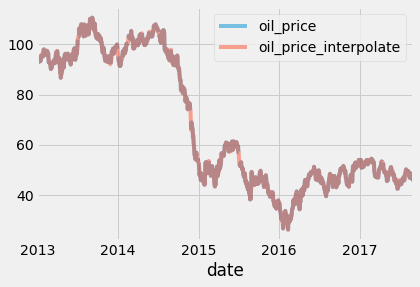

In [6]:
oil_interpolate = oil['oil_price'].interpolate().to_frame()
oil.join(oil_interpolate.add_suffix('_interpolate')).plot(alpha=.5)
plt.show()

In [7]:
df_oil = pd.concat([oil, oil_interpolate], axis= 1)

## Import Data From Excel With Loop

In [8]:
xlsx_ojb = pd.ExcelFile('listings_info.xlsx')
sheetnames = xlsx_ojb.sheet_names

listings = [] # each element of the list is a dataframe
for sheetname in sheetnames:
    df = pd.read_excel(xlsx_ojb, na_values='n/a', sheet_name = sheetname)
    df['Exchange'] = sheetname
    listings.append(df)
listings_concat = pd.concat(listings)
listings_concat.head(5)

Stock Symbol                                       Company Name  \
0            XXII                            22nd Century Group, Inc   
1             FAX              Aberdeen Asia-Pacific Income Fund Inc   
2             IAF                 Aberdeen Australia Equity Fund Inc   
3              CH                          Aberdeen Chile Fund, Inc.   
4  ABE             Aberdeen Emerging Markets Smaller Company Oppo...   

   Last Sale  Market Capitalization  IPO Year                 Sector  \
0     1.3300           1.206285e+08       NaN  Consumer Non-Durables   
1     5.0000           1.266333e+09    1986.0                    NaN   
2     6.1500           1.398653e+08       NaN                    NaN   
3     7.2201           6.756346e+07       NaN                    NaN   
4    13.3600           1.288430e+08       NaN                    NaN   

                Industry Exchange  
0  Farming/Seeds/Milling     amex  
1                    NaN     amex  
2                    NaN     amex  
3                    NaN     amex  
4                    NaN     amex

In [9]:
listings_concat.tail(5)

Stock Symbol               Company Name  Last Sale  \
3142         ZB^H       Zions Bancorporation      25.30   
3143          ZBK       Zions Bancorporation      28.86   
3144         ZOES    Zoe&#39;s Kitchen, Inc.      17.07   
3145          ZTS                Zoetis Inc.      53.10   
3146          ZTO  ZTO Express (Cayman) Inc.      12.63   

      Market Capitalization  IPO Year             Sector  \
3142           0.000000e+00       NaN                NaN   
3143           0.000000e+00       NaN            Finance   
3144           3.325561e+08    2014.0  Consumer Services   
3145           2.610544e+10    2013.0        Health Care   
3146           9.237663e+09    2016.0     Transportation   

                               Industry Exchange  
3142                                NaN     nyse  
3143                        Major Banks     nyse  
3144                        Restaurants     nyse  
3145              Major Pharmaceuticals     nyse  
3146  Trucking Freight/Courier Services     nyse

## Pick The Largest Company In Finance Sector

In [10]:
listings_concat = listings_concat.set_index('Stock Symbol')
listings_concat.head(5)

Company Name  Last Sale  \
Stock Symbol                                                                   
XXII                                      22nd Century Group, Inc     1.3300   
FAX                         Aberdeen Asia-Pacific Income Fund Inc     5.0000   
IAF                            Aberdeen Australia Equity Fund Inc     6.1500   
CH                                      Aberdeen Chile Fund, Inc.     7.2201   
ABE             Aberdeen Emerging Markets Smaller Company Oppo...    13.3600   

                Market Capitalization  IPO Year                 Sector  \
Stock Symbol                                                             
XXII                     1.206285e+08       NaN  Consumer Non-Durables   
FAX                      1.266333e+09    1986.0                    NaN   
IAF                      1.398653e+08       NaN                    NaN   
CH                       6.756346e+07       NaN                    NaN   
ABE                      1.288430e+08       NaN                    NaN   

                             Industry Exchange  
Stock Symbol                                    
XXII            Farming/Seeds/Milling     amex  
FAX                               NaN     amex  
IAF                               NaN     amex  
CH                                NaN     amex  
ABE                               NaN     amex

In [11]:
n_largest = 10
tickers_fin_larg3 = listings_concat.loc[listings_concat['Sector']=='Finance','Market Capitalization'].nlargest(n_largest).index

In [12]:
start = dt.date(2010, 1, 1)
stocks_fin_larg3 = pdr.data.DataReader(tickers_fin_larg3, 'yahoo', start)

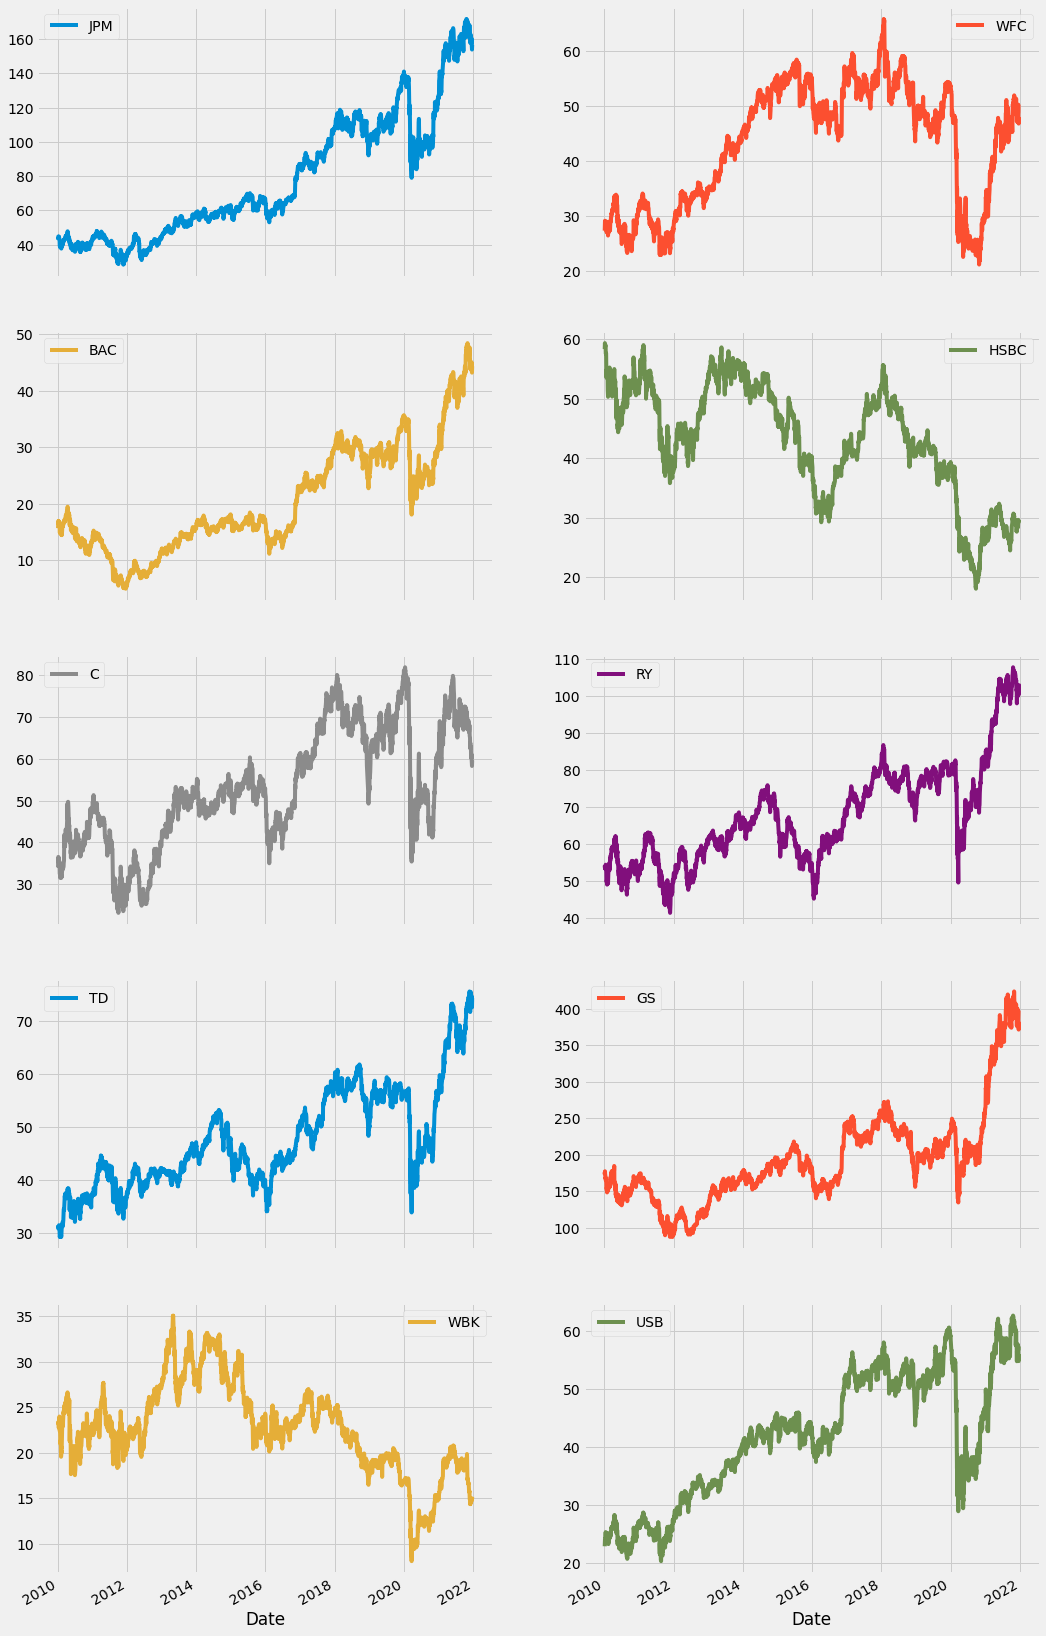

In [13]:
stocks_fin_larg3['Close'].plot(subplots = True, layout = (5, 2), figsize=(16, 32)); plt.show()

## Pick The Largest Major Pharmaceuticals In Health Care Sector

In [14]:
listings_health = listings_concat[listings_concat['Sector']=='Health Care']
hc_type = listings_health['Industry'].unique() 
hc_type

array(['Major Pharmaceuticals', 'Hospital/Nursing Management',
       'Industrial Specialties', 'Medical Specialities',
       'Biotechnology: Biological Products (No Diagnostic Substances)',
       'Medical/Dental Instruments',
       'Biotechnology: Electromedical & Electrotherapeutic Apparatus',
       'Biotechnology: Commercial Physical & Biological Resarch',
       'Biotechnology: In Vitro & In Vivo Diagnostic Substances',
       'Medical/Nursing Services', 'Medical Electronics',
       'Precision Instruments', 'Other Pharmaceuticals',
       'Ophthalmic Goods'], dtype=object)

In [15]:
tickers_hc_large = listings_health[listings_health['Industry']=='Major Pharmaceuticals']['Market Capitalization'].nlargest(n_largest).index

In [16]:
stocks_hc_large = pdr.data.DataReader(tickers_hc_large, 'yahoo', start)

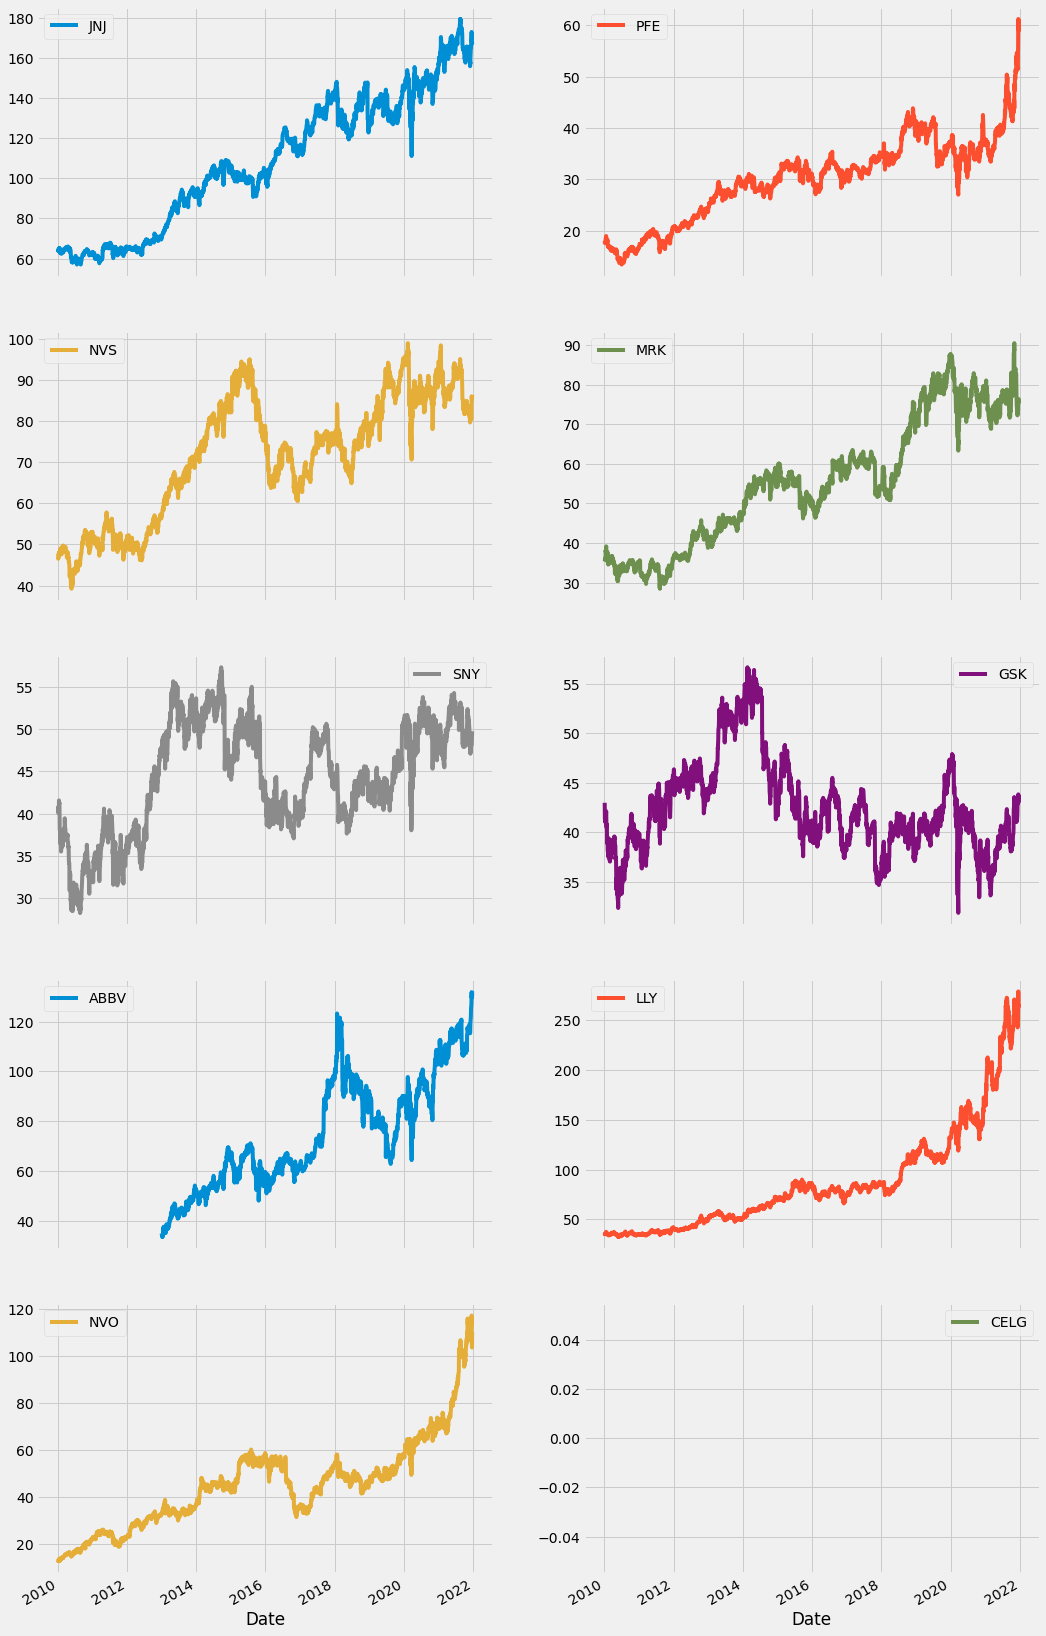

In [17]:
stocks_hc_large['Close'].plot(subplots = True, layout = (5, 2), figsize=(16, 32)); plt.show()

## Multiple Criteria in ```.loc```

In [18]:
listings_concat.loc[(listings_concat['IPO Year'] > 2008) & (listings_concat['Industry'] == 'Precious Metals')]

Company Name  Last Sale  \
Stock Symbol                                                   
AAU                        Almaden Minerals, Ltd.       1.72   
USAS                  Americas Silver Corporation       3.05   
PZG                   Paramount Gold Nevada Corp.       1.80   
TGD                             Timmons Gold Corp       0.43   
WRN           Western Copper and Gold Corporation       1.28   
AGI                              Alamos Gold Inc.       8.20   
OR                      Osisko Gold Royalties Ltd      11.27   

              Market Capitalization  IPO Year            Sector  \
Stock Symbol                                                      
AAU                    1.548917e+08    2015.0  Basic Industries   
USAS                   1.206948e+08    2017.0  Basic Industries   
PZG                    3.200392e+07    2015.0  Basic Industries   
TGD                    1.529203e+08    2011.0  Basic Industries   
WRN                    1.217160e+08    2011.0  Basic Industries   
AGI                    2.450240e+09    2015.0  Basic Industries   
OR                     1.201307e+09    2016.0  Basic Industries   

                     Industry Exchange  
Stock Symbol                            
AAU           Precious Metals     amex  
USAS          Precious Metals     amex  
PZG           Precious Metals     amex  
TGD           Precious Metals     amex  
WRN           Precious Metals     amex  
AGI           Precious Metals     nyse  
OR            Precious Metals     nyse

## Density Plot of Daily Returns

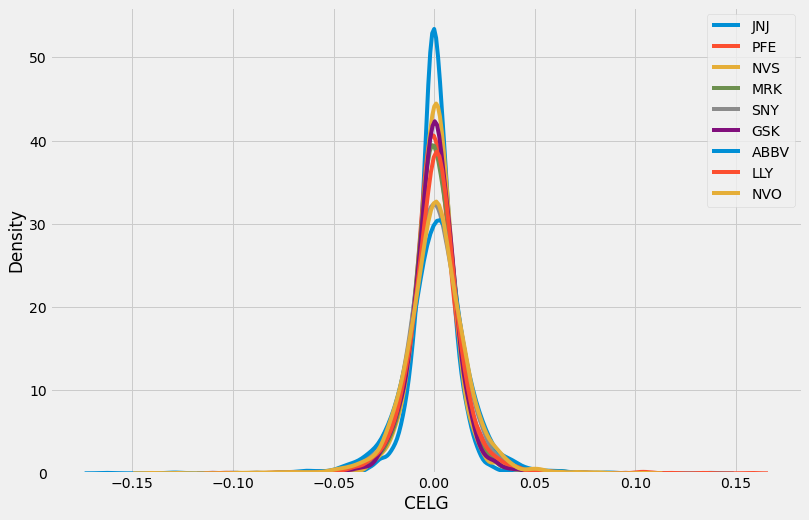

In [19]:
hc_growth = stocks_hc_large['Close'].pct_change()
hc_growth.head()
plt.figure(figsize=(12, 8))
for column in hc_growth.columns:
    sns.distplot(hc_growth[column], hist=False, label=column)
plt.legend()
plt.show()

## Count Sectors

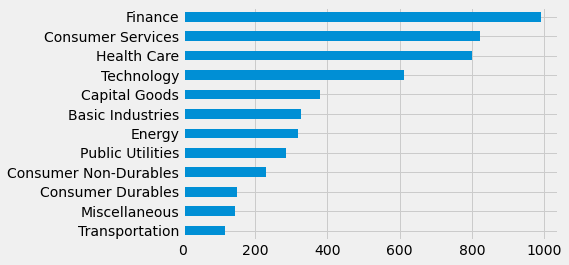

In [20]:
listings_concat['Sector'].value_counts().sort_values(ascending=True).plot(kind='barh'); plt.show()

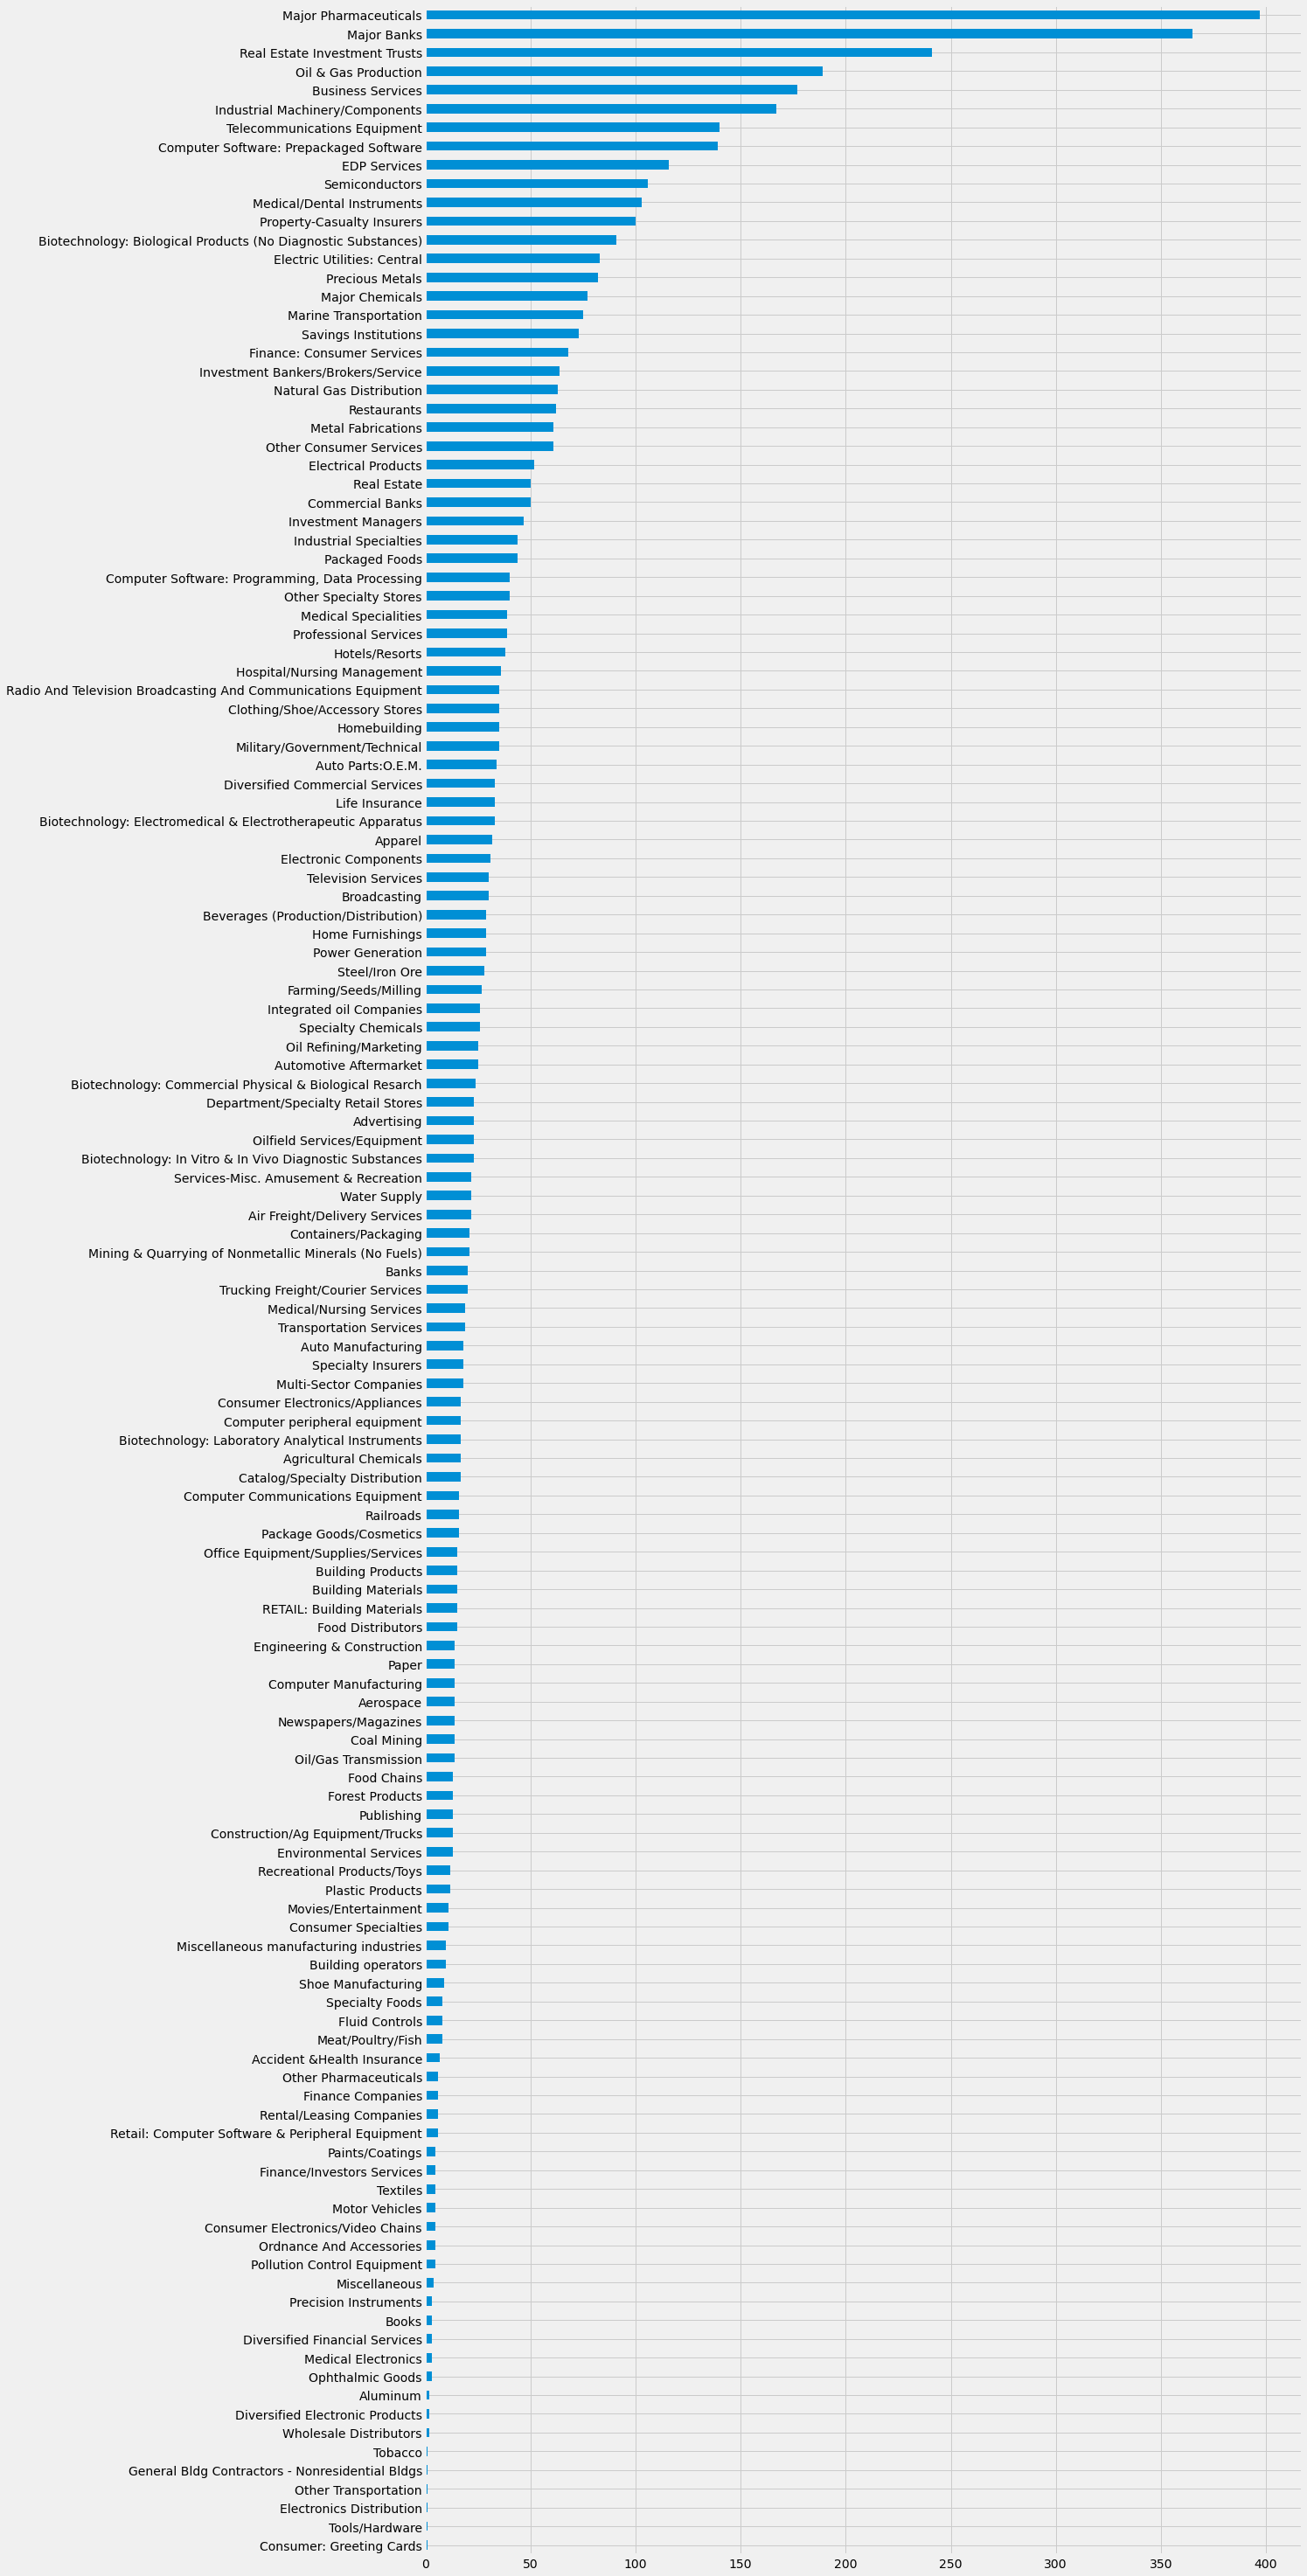

In [21]:
listings_concat['Industry'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(16, 50)); plt.show()

## Group By Multiple Criteria Then Unstack

In [22]:
group_mean = listings_concat.groupby(['Sector', 'Exchange']).mean()
group_mean.head(9)

Last Sale  Market Capitalization     IPO Year
Sector            Exchange                                               
Basic Industries  amex       2.991475           3.916462e+08  2010.125000
                  nasdaq    21.597679           7.248999e+08  2000.766667
                  nyse      39.970990           9.590515e+09  2008.393939
Capital Goods     amex       9.677200           1.139437e+08  1998.200000
                  nasdaq    26.188681           1.511237e+09  2001.324675
                  nyse      68.115082           1.016690e+10  2006.754098
Consumer Durables amex      24.637025           2.344459e+08          NaN
                  nasdaq    24.363391           8.398026e+08  2003.222222
                  nyse      56.791724           5.854122e+09  2006.052632

In [23]:
gm_unstacked = group_mean.unstack()
gm_unstacked

Last Sale                       Market Capitalization  \
Exchange                     amex     nasdaq       nyse                  amex   
Sector                                                                          
Basic Industries         2.991475  21.597679  39.970990          3.916462e+08   
Capital Goods            9.677200  26.188681  68.115082          1.139437e+08   
Consumer Durables       24.637025  24.363391  56.791724          2.344459e+08   
Consumer Non-Durables   16.491531  25.749565  49.625351          8.868469e+09   
Consumer Services       13.251496  34.917318  41.385346          2.299553e+08   
Energy                   7.014829  15.496834  29.145299          1.090152e+09   
Finance                364.009875  29.644242  46.251623          7.475354e+08   
Health Care              3.398202  19.462531  65.695140          1.200158e+08   
Miscellaneous            5.456860  46.094369  52.180196          6.755143e+07   
Public Utilities        20.382791  18.643705  37.618231          2.676119e+09   
Technology               6.129240  31.100317  38.301813          5.955266e+07   
Transportation           5.440000  28.096758  35.243326          2.654897e+08   

                                                      IPO Year               \
Exchange                     nasdaq          nyse         amex       nasdaq   
Sector                                                                        
Basic Industries       7.248999e+08  9.590515e+09  2010.125000  2000.766667   
Capital Goods          1.511237e+09  1.016690e+10  1998.200000  2001.324675   
Consumer Durables      8.398026e+08  5.854122e+09          NaN  2003.222222   
Consumer Non-Durables  3.104051e+09  1.779858e+10  2006.000000  2000.609756   
Consumer Services      5.582344e+09  6.766358e+09  2008.222222  2004.104575   
Energy                 8.266076e+08  1.291533e+10  2015.000000  2008.034483   
Finance                1.044090e+09  1.388068e+10  1996.000000  2010.321101   
Health Care            1.758709e+09  2.856282e+10  2014.000000  2009.240409   
Miscellaneous          3.445656e+09  1.859417e+10  2017.000000  2004.333333   
Public Utilities       2.357865e+09  1.341256e+10  2011.000000  2006.040000   
Technology             1.088343e+10  9.790157e+09  2005.500000  2002.653285   
Transportation         2.869660e+09  8.491577e+09          NaN  1997.809524   

                                    
Exchange                      nyse  
Sector                              
Basic Industries       2008.393939  
Capital Goods          2006.754098  
Consumer Durables      2006.052632  
Consumer Non-Durables  2007.574468  
Consumer Services      2008.337500  
Energy                 2008.699115  
Finance                2009.250000  
Health Care            2008.883721  
Miscellaneous          2009.360000  
Public Utilities       2010.697368  
Technology             2009.833333  
Transportation         2010.162162

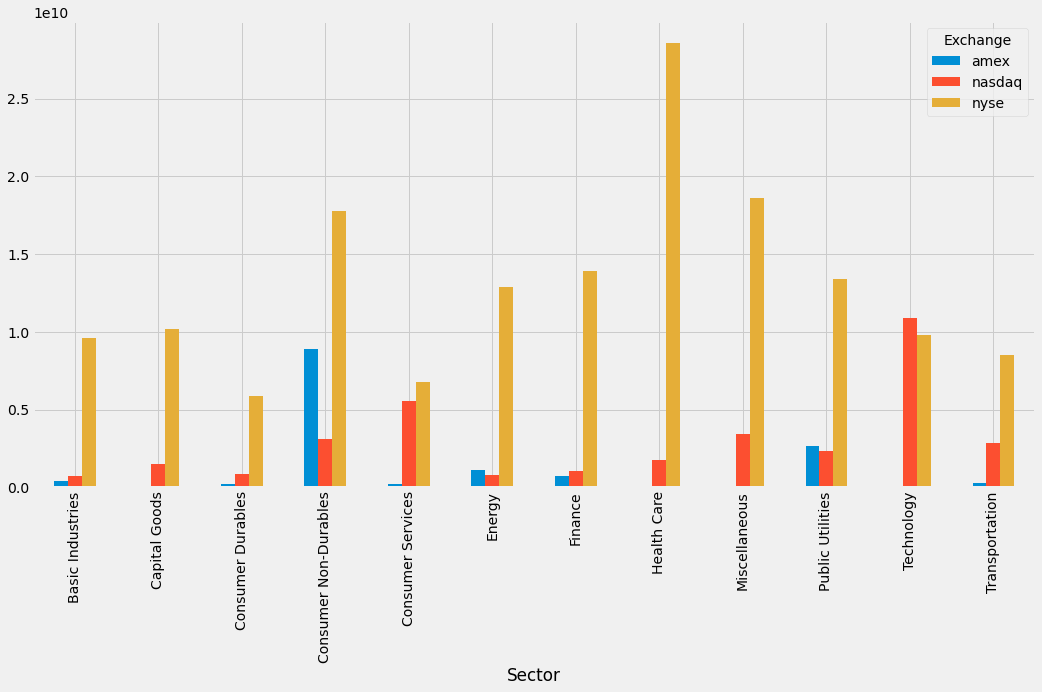

In [24]:
gm_unstacked['Market Capitalization'].plot(kind='bar', figsize=(16, 8)); plt.show()

## Aggregate Functions

In [25]:
listings_concat.groupby(['Sector', 'Exchange'])['Market Capitalization'].agg(Mean='mean', Median='median', STD='std').unstack()

Mean                                    Median  \
Exchange                       amex        nasdaq          nyse          amex   
Sector                                                                          
Basic Industries       3.916462e+08  7.248999e+08  9.590515e+09  1.485646e+08   
Capital Goods          1.139437e+08  1.511237e+09  1.016690e+10  4.959603e+07   
Consumer Durables      2.344459e+08  8.398026e+08  5.854122e+09  1.833740e+07   
Consumer Non-Durables  8.868469e+09  3.104051e+09  1.779858e+10  6.008702e+07   
Consumer Services      2.299553e+08  5.582344e+09  6.766358e+09  4.414287e+07   
Energy                 1.090152e+09  8.266076e+08  1.291533e+10  5.096386e+07   
Finance                7.475354e+08  1.044090e+09  1.388068e+10  2.386093e+08   
Health Care            1.200158e+08  1.758709e+09  2.856282e+10  4.276360e+07   
Miscellaneous          6.755143e+07  3.445656e+09  1.859417e+10  5.913104e+07   
Public Utilities       2.676119e+09  2.357865e+09  1.341256e+10  8.328349e+07   
Technology             5.955266e+07  1.088343e+10  9.790157e+09  3.968076e+07   
Transportation         2.654897e+08  2.869660e+09  8.491577e+09  2.654897e+08   

                                                            STD                \
Exchange                     nasdaq          nyse          amex        nasdaq   
Sector                                                                          
Basic Industries       1.503852e+08  2.450240e+09  6.053079e+08  1.445545e+09   
Capital Goods          2.938010e+08  3.215113e+09  1.619466e+08  4.829847e+09   
Consumer Durables      1.775939e+08  2.982585e+09  4.418130e+08  1.907605e+09   
Consumer Non-Durables  2.299307e+08  4.701718e+09  3.171573e+10  1.299809e+10   
Consumer Services      5.241519e+08  1.784206e+09  4.358058e+08  2.649225e+10   
Energy                 1.824278e+08  1.838884e+09  4.783382e+09  1.568870e+09   
Finance                2.054766e+08  2.177155e+09  1.305761e+09  2.874796e+09   
Health Care            1.738233e+08  5.879060e+09  2.271879e+08  8.767259e+09   
Miscellaneous          2.280962e+08  3.734556e+09  3.954355e+07  1.146105e+10   
Public Utilities       3.789958e+08  4.087368e+09  4.490753e+09  8.729065e+09   
Technology             6.007210e+08  2.077509e+09  4.918449e+07  6.227940e+10   
Transportation         4.797775e+08  7.982157e+08           NaN  6.915407e+09   

                                     
Exchange                       nyse  
Sector                               
Basic Industries       2.484547e+10  
Capital Goods          2.025462e+10  
Consumer Durables      8.996673e+09  
Consumer Non-Durables  3.660858e+10  
Consumer Services      1.869368e+10  
Energy                 3.668970e+10  
Finance                3.235082e+10  
Health Care            5.186314e+10  
Miscellaneous          5.000191e+10  
Public Utilities       2.913915e+10  
Technology             2.613643e+10  
Transportation         1.828119e+10

## countplot

In [26]:
listings_concat_post2000 = listings_concat[listings_concat['IPO Year']>2000]
listings_concat_post2000.head()

Company Name  Last Sale  Market Capitalization  \
Stock Symbol                                                                  
AAU                Almaden Minerals, Ltd.     1.7200           1.548917e+08   
USAS          Americas Silver Corporation     3.0500           1.206948e+08   
AINC                         Ashford Inc.    57.3373           1.155508e+08   
AUXO                        Auxilio, Inc.     6.3043           5.913104e+07   
BPMX                BioPharmX Corporation     0.6999           4.739693e+07   

              IPO Year             Sector               Industry Exchange  
Stock Symbol                                                               
AAU             2015.0   Basic Industries        Precious Metals     amex  
USAS            2017.0   Basic Industries        Precious Metals     amex  
AINC            2014.0  Consumer Services  Professional Services     amex  
AUXO            2017.0      Miscellaneous      Business Services     amex  
BPMX            2015.0        Health Care  Major Pharmaceuticals     amex

In [27]:
listings_concat_post2000['IPO Year'] = listings_concat_post2000['IPO Year'].astype(int)
listings_concat_post2000.head()

Company Name  Last Sale  Market Capitalization  \
Stock Symbol                                                                  
AAU                Almaden Minerals, Ltd.     1.7200           1.548917e+08   
USAS          Americas Silver Corporation     3.0500           1.206948e+08   
AINC                         Ashford Inc.    57.3373           1.155508e+08   
AUXO                        Auxilio, Inc.     6.3043           5.913104e+07   
BPMX                BioPharmX Corporation     0.6999           4.739693e+07   

              IPO Year             Sector               Industry Exchange  
Stock Symbol                                                               
AAU               2015   Basic Industries        Precious Metals     amex  
USAS              2017   Basic Industries        Precious Metals     amex  
AINC              2014  Consumer Services  Professional Services     amex  
AUXO              2017      Miscellaneous      Business Services     amex  
BPMX              2015        Health Care  Major Pharmaceuticals     amex

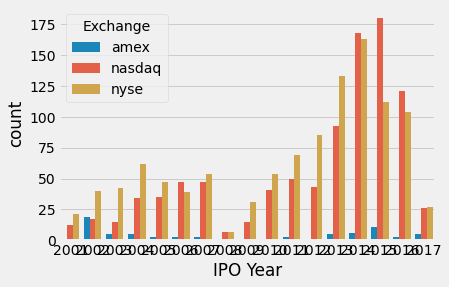

In [28]:
sns.countplot(x = 'IPO Year', hue = 'Exchange', data = listings_concat_post2000);plt.show()

In [29]:
listings_concat_post2000

Company Name  Last Sale  Market Capitalization  \
Stock Symbol                                                                  
AAU                Almaden Minerals, Ltd.     1.7200           1.548917e+08   
USAS          Americas Silver Corporation     3.0500           1.206948e+08   
AINC                         Ashford Inc.    57.3373           1.155508e+08   
AUXO                        Auxilio, Inc.     6.3043           5.913104e+07   
BPMX                BioPharmX Corporation     0.6999           4.739693e+07   
...                                   ...        ...                    ...   
ZEN                         Zendesk, Inc.    28.1800           2.772825e+09   
ZPIN                      Zhaopin Limited    17.8500           9.955009e+08   
ZOES              Zoe&#39;s Kitchen, Inc.    17.0700           3.325561e+08   
ZTS                           Zoetis Inc.    53.1000           2.610544e+10   
ZTO             ZTO Express (Cayman) Inc.    12.6300           9.237663e+09   

              IPO Year             Sector                           Industry  \
Stock Symbol                                                                   
AAU               2015   Basic Industries                    Precious Metals   
USAS              2017   Basic Industries                    Precious Metals   
AINC              2014  Consumer Services              Professional Services   
AUXO              2017      Miscellaneous                  Business Services   
BPMX              2015        Health Care              Major Pharmaceuticals   
...                ...                ...                                ...   
ZEN               2014         Technology                       EDP Services   
ZPIN              2014         Technology              Professional Services   
ZOES              2014  Consumer Services                        Restaurants   
ZTS               2013        Health Care              Major Pharmaceuticals   
ZTO               2016     Transportation  Trucking Freight/Courier Services   

             Exchange  
Stock Symbol           
AAU              amex  
USAS             amex  
AINC             amex  
AUXO             amex  
BPMX             amex  
...               ...  
ZEN              nyse  
ZPIN             nyse  
ZOES             nyse  
ZTS              nyse  
ZTO              nyse  

[2113 rows x 7 columns]

In [30]:
time_stamp = pd.Timestamp(dt.datetime(2021,12,25))

In [31]:
filter_dunder(time_stamp)

meth_attr
0    _date_repr
1    _repr_base
2        _round
3   _short_repr
4    _time_repr
..          ...
75        value
76         week
77      weekday
78   weekofyear
79         year

[80 rows x 1 columns]

In [32]:
print(time_stamp.year)
print(time_stamp.month)
print(time_stamp.day)
print(time_stamp.day_name())

2021
12
25
Saturday


In [33]:
print(time_stamp)

2021-12-25 00:00:00


In [34]:
period = pd.Period('2021-8'); period

Period('2021-08', 'M')

In [35]:
period_2 = pd.Period('2021-8-28', 'D'); period_2

Period('2021-08-28', 'D')

In [36]:
print(period + 2)

2021-10


In [37]:
print(period_2 - 10)

2021-08-18


## Sequence of Time

Each object in the ```date_range``` is a ```Timestamp``` object.

In [38]:
index = pd.date_range(start = '2010-12', end = '2021-12', freq = 'M')
index

DatetimeIndex(['2010-12-31', '2011-01-31', '2011-02-28', '2011-03-31',
               '2011-04-30', '2011-05-31', '2011-06-30', '2011-07-31',
               '2011-08-31', '2011-09-30',
               ...
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30'],
              dtype='datetime64[ns]', length=132, freq='M')

In [39]:
index.to_period()

PeriodIndex(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
             '2011-06', '2011-07', '2011-08', '2011-09',
             ...
             '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
             '2021-08', '2021-09', '2021-10', '2021-11'],
            dtype='period[M]', length=132, freq='M')

In [40]:
index_2 = pd.date_range(start= '2021-12-1', periods = 10)
for day in index_2:
    print(str(day.day) + ':' + day.day_name())

1:Wednesday
2:Thursday
3:Friday
4:Saturday
5:Sunday
6:Monday
7:Tuesday
8:Wednesday
9:Thursday
10:Friday


In [41]:
index_2

DatetimeIndex(['2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04',
               '2021-12-05', '2021-12-06', '2021-12-07', '2021-12-08',
               '2021-12-09', '2021-12-10'],
              dtype='datetime64[ns]', freq='D')

## Create a Time Series

In [42]:
time_series = pd.DataFrame({'Time':index})

In [43]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    132 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.2 KB


In [44]:
data = np.random.randn(len(index), 2)

In [45]:
time_series = pd.DataFrame(data = data, index = index, columns =['Series_1', 'Series_2'])

Colormap is <a href='https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html'> here </a>

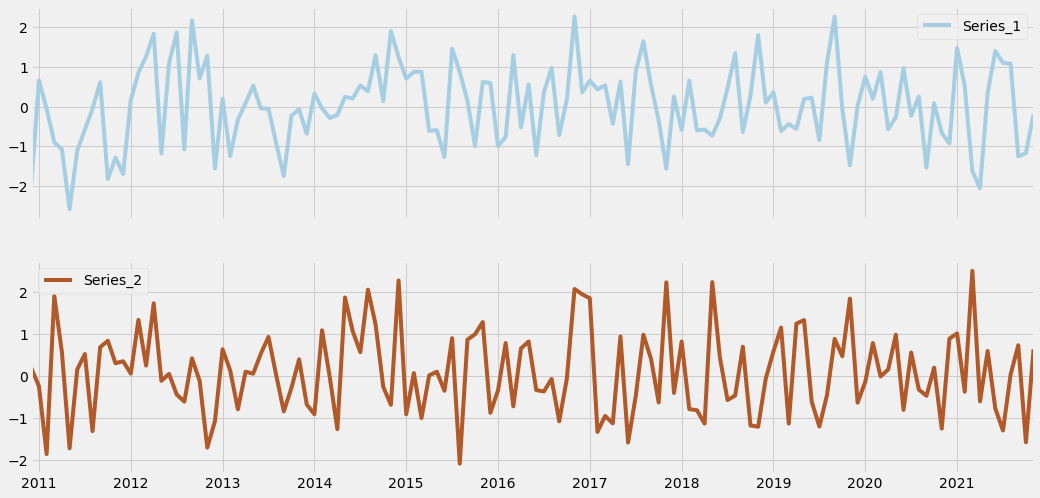

In [46]:
time_series.plot(colormap = 'Paired', figsize=(16, 8), subplots=True); plt.show()

In [47]:
tesla_stockp = pdr.data.DataReader(name = 'TSLA', data_source = 'yahoo', start = '2018-1-1', end = '2021-12-1')

In [48]:
tesla_stockp.head(10)

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2018-01-02  64.421997  62.200001  62.400002  64.106003  21761000.0  64.106003
2018-01-03  65.050003  63.110001  64.199997  63.450001  22607500.0  63.450001
2018-01-04  63.709999  61.136002  62.574001  62.924000  49731500.0  62.924000
2018-01-05  63.448002  62.400002  63.324001  63.316002  22956000.0  63.316002
2018-01-08  67.403999  63.099998  63.200001  67.281998  49297000.0  67.281998
2018-01-09  67.760002  65.480003  67.031998  66.737999  35733000.0  66.737999
2018-01-10  67.400002  66.000000  66.440002  66.959999  21549500.0  66.959999
2018-01-11  68.961998  66.652000  67.047997  67.589996  33227500.0  67.589996
2018-01-12  68.082001  66.734001  67.725998  67.244003  24125500.0  67.244003
2018-01-16  69.000000  66.959999  67.508003  68.012001  32371500.0  68.012001

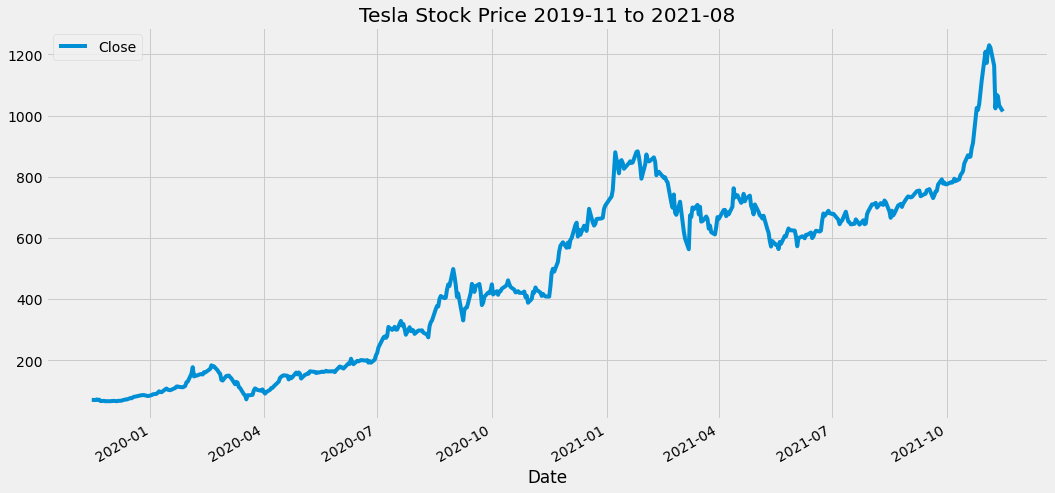

In [49]:
tesla_stockp.loc['2019-11-15':'2021-11-15', ['Close']].plot(figsize=(16, 8), 
                                                            title = 'Tesla Stock Price 2019-11 to 2021-08'); plt.show()

Upsampling to including non-trade days, such as weekends.

In [50]:
tesla_stockp.asfreq('D').head(10)

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2018-01-02  64.421997  62.200001  62.400002  64.106003  21761000.0  64.106003
2018-01-03  65.050003  63.110001  64.199997  63.450001  22607500.0  63.450001
2018-01-04  63.709999  61.136002  62.574001  62.924000  49731500.0  62.924000
2018-01-05  63.448002  62.400002  63.324001  63.316002  22956000.0  63.316002
2018-01-06        NaN        NaN        NaN        NaN         NaN        NaN
2018-01-07        NaN        NaN        NaN        NaN         NaN        NaN
2018-01-08  67.403999  63.099998  63.200001  67.281998  49297000.0  67.281998
2018-01-09  67.760002  65.480003  67.031998  66.737999  35733000.0  66.737999
2018-01-10  67.400002  66.000000  66.440002  66.959999  21549500.0  66.959999
2018-01-11  68.961998  66.652000  67.047997  67.589996  33227500.0  67.589996

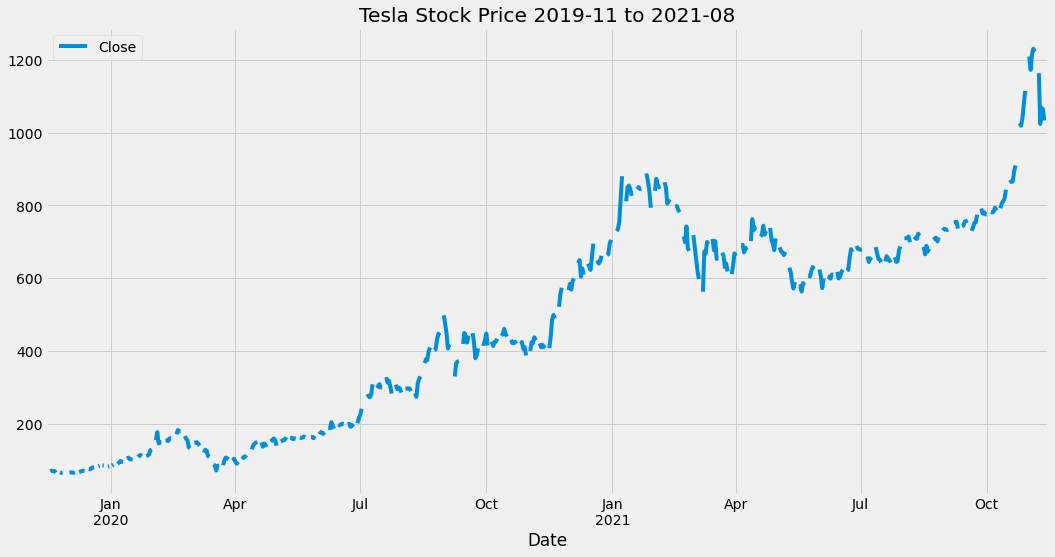

In [51]:
tesla_stockp.asfreq('D').loc['2019-11-15':'2021-11-15', ['Close']].plot(figsize=(16, 8), 
                                                            title = 'Tesla Stock Price 2019-11 to 2021-08'); plt.show()

## Compare Each Years Data

In [52]:
tesla_prices = pd.DataFrame()
for year in ['2018', '2019', '2020', '2021']:
    price_per_year = tesla_stockp.loc[year, ['Close']].reset_index(drop=True)
    price_per_year.rename(columns={'Close':year+' close'}, inplace=True)
    tesla_prices = pd.concat([tesla_prices, price_per_year], axis=1)
    
tesla_prices.head()

2018 close  2019 close  2020 close  2021 close
0   64.106003   62.023998   86.052002  729.770020
1   63.450001   60.071999   88.601997  735.109985
2   62.924000   63.537998   90.307999  755.979980
3   63.316002   66.991997   93.811996  816.039978
4   67.281998   67.070000   98.428001  880.020020

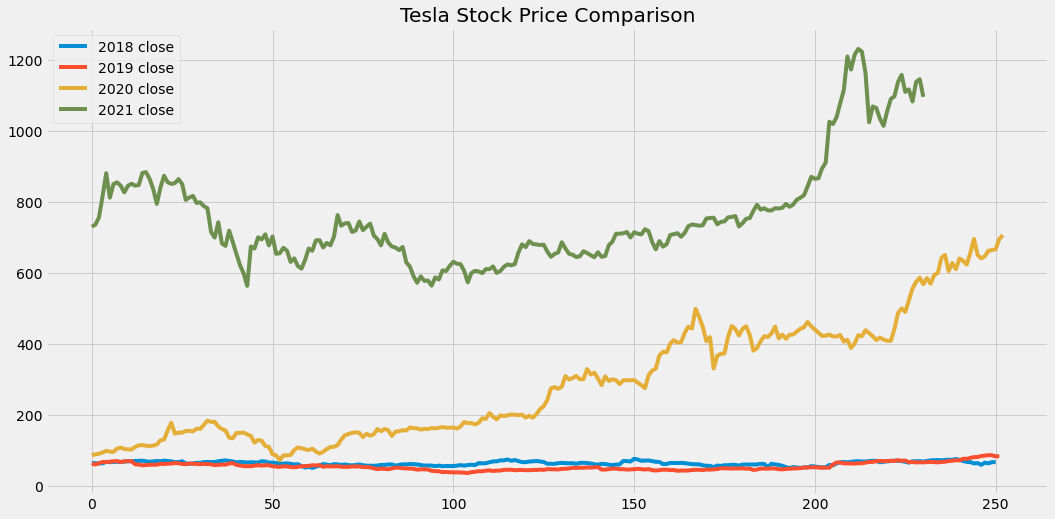

In [53]:
tesla_prices.plot(figsize=(16, 8), title ='Tesla Stock Price Comparison'); plt.show()

## Resampling

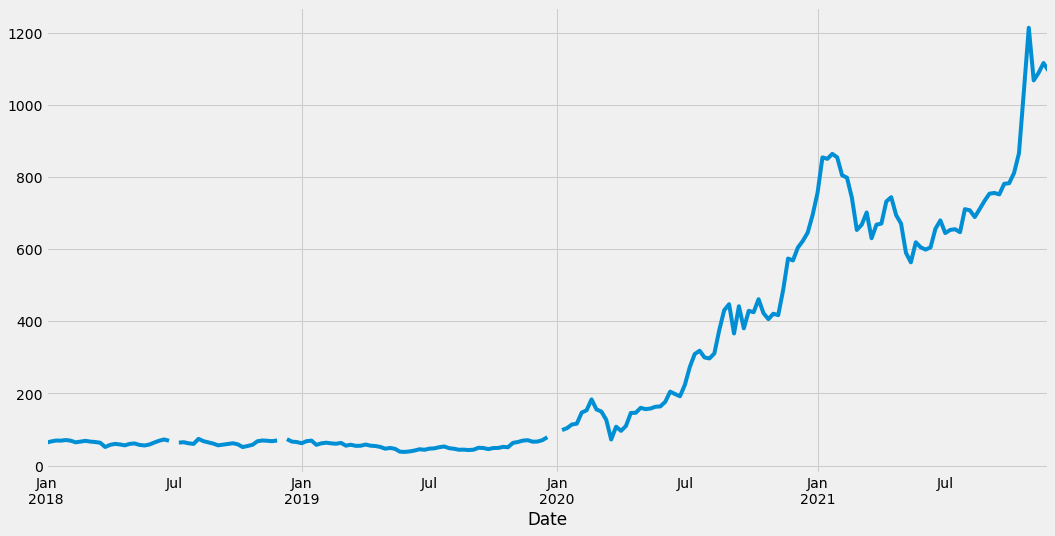

In [54]:
tesla_stockp['Close'].asfreq('W-Wed').plot(figsize = (16, 8)); plt.show()

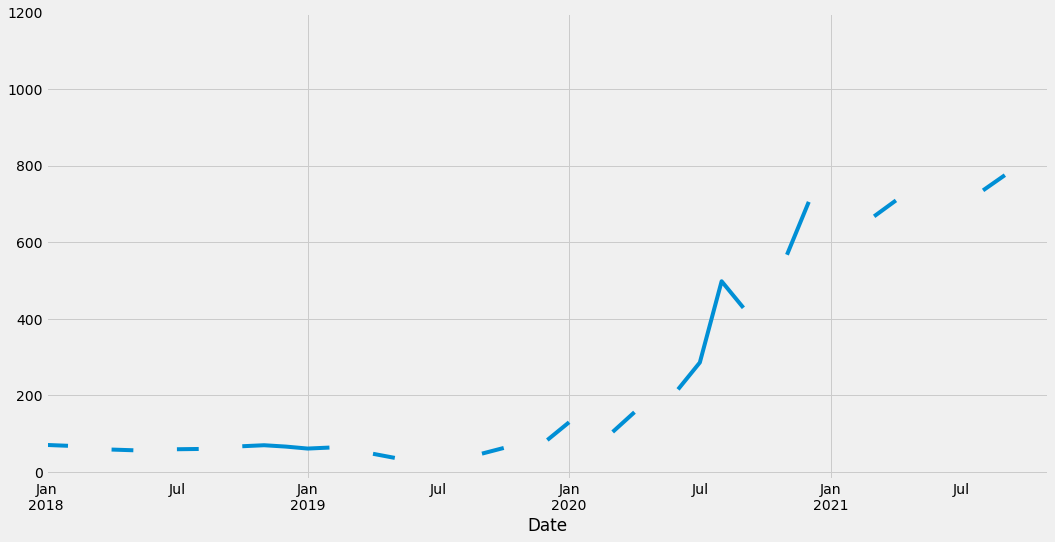

In [55]:
tesla_stockp['Close'].asfreq('M').plot(figsize = (16, 8)); plt.show()

## Lagged Variable

In [56]:
tesla_stockp['Lag_1'] = tesla_stockp['Close'].shift()
tesla_stockp['Daily Change'] = tesla_stockp['Close'].div(tesla_stockp['Lag_1'])

In [57]:
tesla_stockp.head()

High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2018-01-02  64.421997  62.200001  62.400002  64.106003  21761000.0  64.106003   
2018-01-03  65.050003  63.110001  64.199997  63.450001  22607500.0  63.450001   
2018-01-04  63.709999  61.136002  62.574001  62.924000  49731500.0  62.924000   
2018-01-05  63.448002  62.400002  63.324001  63.316002  22956000.0  63.316002   
2018-01-08  67.403999  63.099998  63.200001  67.281998  49297000.0  67.281998   

                Lag_1  Daily Change  
Date                                 
2018-01-02        NaN           NaN  
2018-01-03  64.106003      0.989767  
2018-01-04  63.450001      0.991710  
2018-01-05  62.924000      1.006230  
2018-01-08  63.316002      1.062638

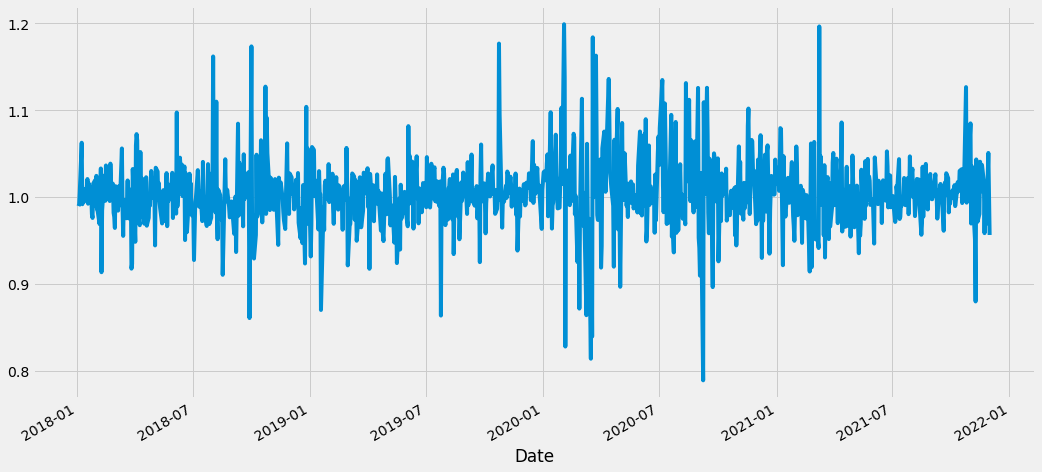

In [58]:
tesla_stockp['Daily Change'].plot(figsize = (16, 8)); plt.show()

## Growth Rate

In [59]:
tesla_stockp['change_pct'] = tesla_stockp['Close'].pct_change()

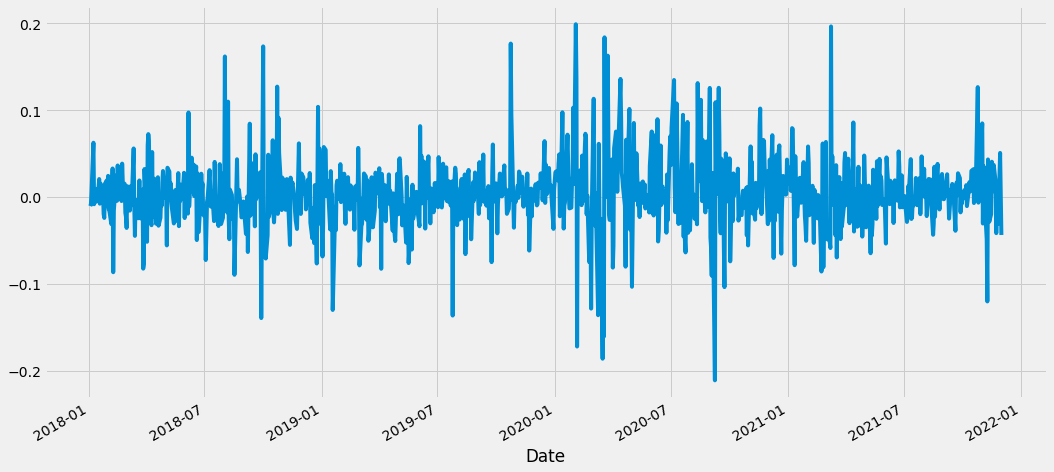

In [60]:
tesla_stockp['change_pct'].plot(figsize = (16, 8)); plt.show()

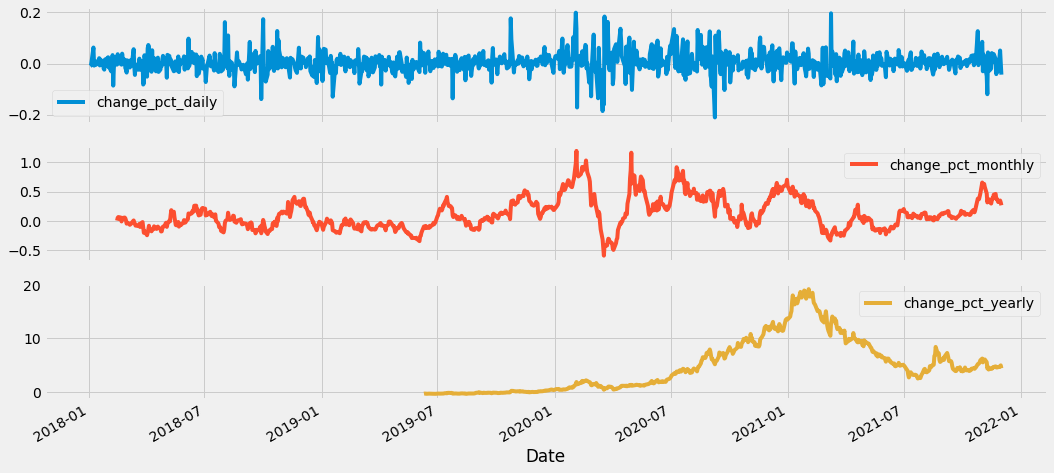

In [61]:
tesla_stockp['change_pct_daily'] = tesla_stockp['Close'].pct_change()
tesla_stockp['change_pct_monthly'] = tesla_stockp['Close'].pct_change(periods=30)
tesla_stockp['change_pct_yearly'] = tesla_stockp['Close'].pct_change(periods=360)
tesla_stockp[['change_pct_daily', 'change_pct_monthly', 'change_pct_yearly']]\
.plot(subplots=True, figsize = (16, 8)); plt.show()

In [62]:
# SP500, Gold, Crude oil, Gold, Bitcoin, Nikkei 225
assets_tickers =  ['^GSPC', 'GC=F', 'CL=F', 'BTC-USD', '^N225']
legends = ['SP500', 'Gold', 'Crude oil', 'Gold', 'Bitcoin', 'Nikkei 225']
start_date = '2010-1-1'
end_date = '2021-12-1'
assets_price = pdr.data.DataReader(name = assets_tickers, data_source = 'yahoo', start = start_date, end = end_date)

In [63]:
normalized_prices = assets_price['Close'].div(assets_price['Close'].iloc[0]).mul(100)

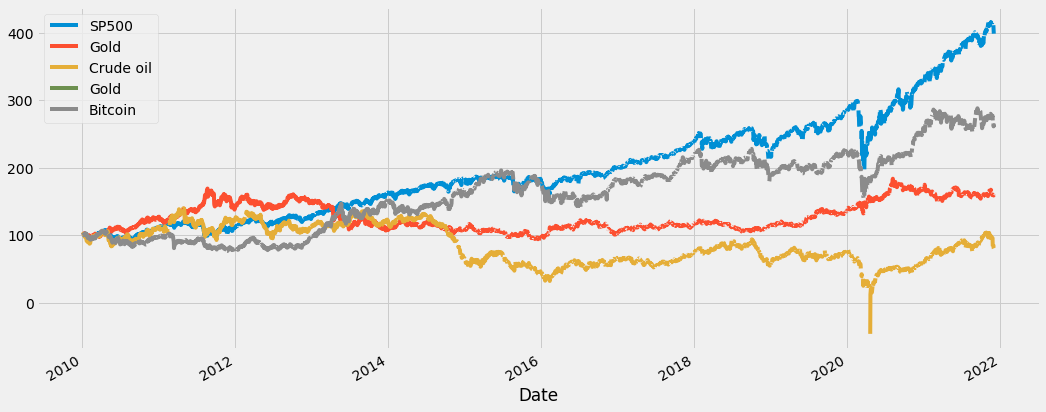

In [64]:
price_plot = normalized_prices.plot(figsize = (16, 7))
price_plot.legend(legends)
plt.show()

## Correlation

In [65]:
assets_close = assets_price['Close']
assets_close.columns = ['SP500', 'Crude oil', 'Gold', 'Bitcoin', 'Nikkei 225']

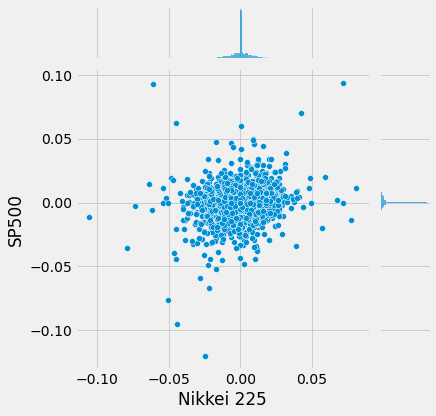

In [66]:
sns.jointplot(x='Nikkei 225', y='SP500', data=assets_close.pct_change()); plt.show()

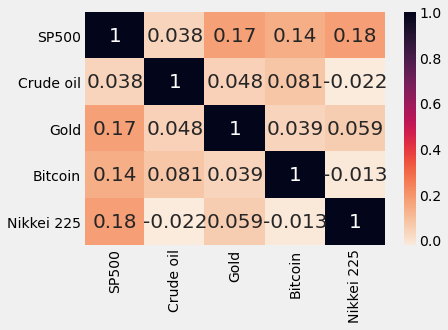

In [67]:
assets_corr = assets_close.pct_change().corr()
sns.heatmap(assets_corr, annot=True, cmap = sns.cm.rocket_r,annot_kws={"size": 20}); plt.show()

Furthermore, ```clustermap``` can organize similar data by similarity, which brings more insight into the data set.

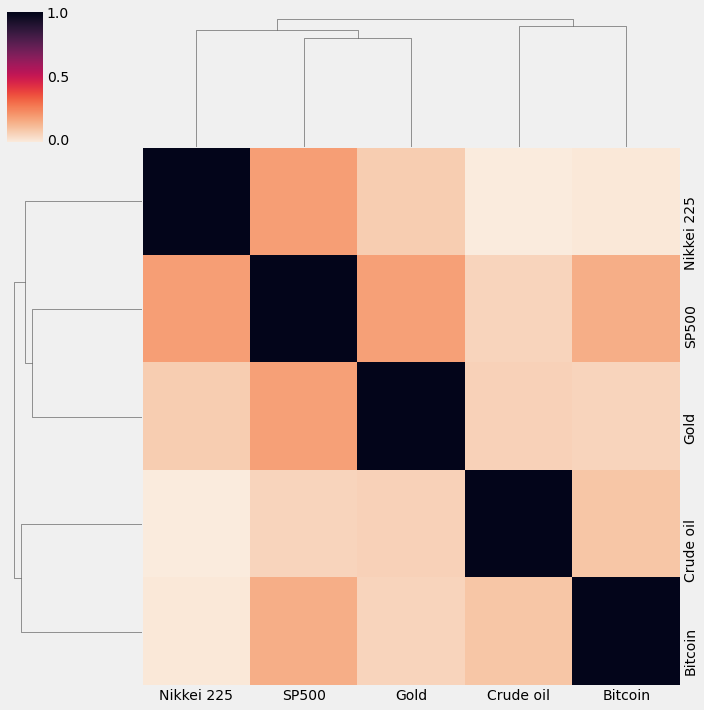

In [68]:
sns.clustermap(assets_corr, cmap = sns.cm.rocket_r); plt.show()

## Normalization

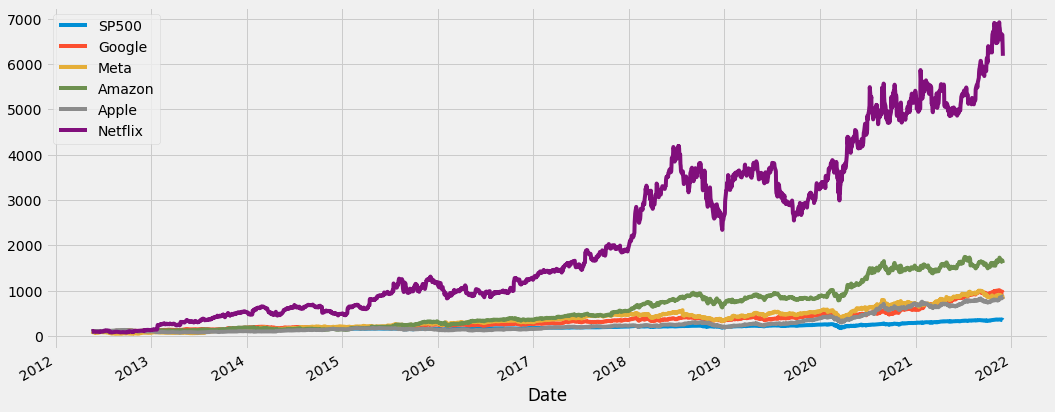

In [69]:
assets_tickers =  ['^GSPC', 'GOOG', 'FB', 'AMZN', 'AAPL', 'NFLX']
legends = ['SP500', 'Google', 'Meta', 'Amazon', 'Apple', 'Netflix']
start_date = '2010-1-1'
end_date = '2021-12-1'
assets_price = pdr.data.DataReader(name = assets_tickers, data_source = 'yahoo', start = start_date, end = end_date).dropna()

price_plot = assets_price['Close'].div(assets_price['Close'].iloc[0]).mul(100).plot(figsize = (16, 7), grid = True)
price_plot.legend(legends)
plt.show()

Make them start from $0$.

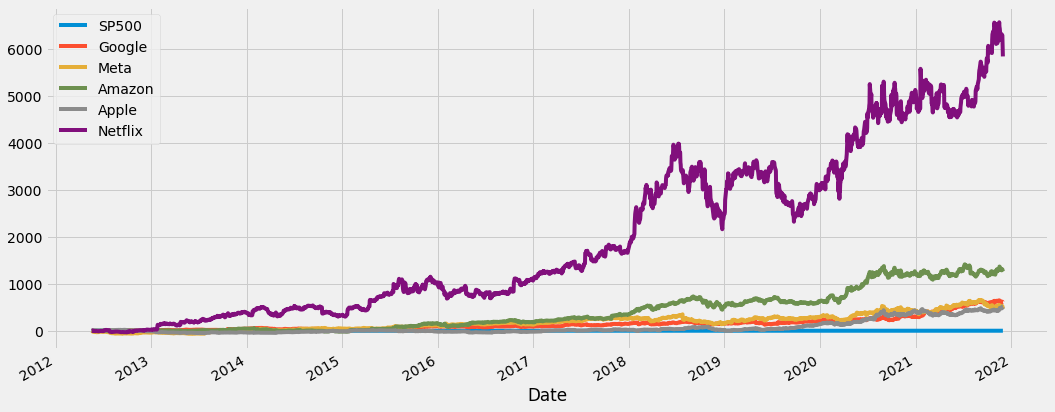

In [70]:
normalized = assets_price['Close'].div(assets_price['Close'].iloc[0]).mul(100)

price_plot = normalized[assets_tickers].sub(normalized['^GSPC'], axis = 0).plot(figsize = (16, 7), grid = True)
price_plot.legend(legends)
plt.show()

## Changing Data Frequency

In [71]:
start = '2021-1-15'
end = '2021-12-20'
dates = pd.date_range(start = start, end = end, freq='M')
dates

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30'],
              dtype='datetime64[ns]', freq='M')

In [72]:
monthly = pd.Series(data = np.arange(len(dates)), index = dates); monthly

2021-01-31     0
2021-02-28     1
2021-03-31     2
2021-04-30     3
2021-05-31     4
2021-06-30     5
2021-07-31     6
2021-08-31     7
2021-09-30     8
2021-10-31     9
2021-11-30    10
Freq: M, dtype: int32

In [73]:
weekly_dates = pd.date_range(start = start, end = end, freq='W'); weekly_dates

DatetimeIndex(['2021-01-17', '2021-01-24', '2021-01-31', '2021-02-07',
               '2021-02-14', '2021-02-21', '2021-02-28', '2021-03-07',
               '2021-03-14', '2021-03-21', '2021-03-28', '2021-04-04',
               '2021-04-11', '2021-04-18', '2021-04-25', '2021-05-02',
               '2021-05-09', '2021-05-16', '2021-05-23', '2021-05-30',
               '2021-06-06', '2021-06-13', '2021-06-20', '2021-06-27',
               '2021-07-04', '2021-07-11', '2021-07-18', '2021-07-25',
               '2021-08-01', '2021-08-08', '2021-08-15', '2021-08-22',
               '2021-08-29', '2021-09-05', '2021-09-12', '2021-09-19',
               '2021-09-26', '2021-10-03', '2021-10-10', '2021-10-17',
               '2021-10-24', '2021-10-31', '2021-11-07', '2021-11-14',
               '2021-11-21', '2021-11-28', '2021-12-05', '2021-12-12',
               '2021-12-19'],
              dtype='datetime64[ns]', freq='W-SUN')

Conform the data with new index. ```bfill``` and ```ffill``` mean fill backward and forward.

In [74]:
monthly.reindex(weekly_dates).head(10)

2021-01-17    NaN
2021-01-24    NaN
2021-01-31    0.0
2021-02-07    NaN
2021-02-14    NaN
2021-02-21    NaN
2021-02-28    1.0
2021-03-07    NaN
2021-03-14    NaN
2021-03-21    NaN
Freq: W-SUN, dtype: float64

In [75]:
monthly.reindex(weekly_dates, method = 'bfill').head(10)

2021-01-17    0.0
2021-01-24    0.0
2021-01-31    0.0
2021-02-07    1.0
2021-02-14    1.0
2021-02-21    1.0
2021-02-28    1.0
2021-03-07    2.0
2021-03-14    2.0
2021-03-21    2.0
Freq: W-SUN, dtype: float64

In [76]:
monthly.reindex(weekly_dates, method = 'ffill').head(10)

2021-01-17    NaN
2021-01-24    NaN
2021-01-31    0.0
2021-02-07    0.0
2021-02-14    0.0
2021-02-21    0.0
2021-02-28    1.0
2021-03-07    1.0
2021-03-14    1.0
2021-03-21    1.0
Freq: W-SUN, dtype: float64

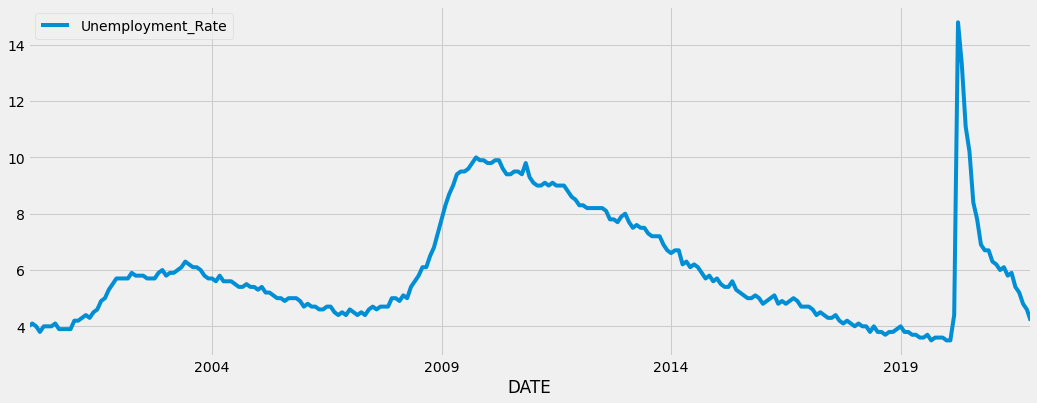

In [77]:
df_unempl = pdr.data.DataReader(name='UNRATE', data_source='fred', start = '2000-1-1', end = dt.date.today())
df_unempl.columns = ['Unemployment_Rate']
df_unempl.plot(figsize=(16, 6))
plt.show()

In [78]:
df_unempl.head()

Unemployment_Rate
DATE                         
2000-01-01                4.0
2000-02-01                4.1
2000-03-01                4.0
2000-04-01                3.8
2000-05-01                4.0

Change the frequency to weekly data, the missing values will be filled by existing values.

In [79]:
df_unempl_bfill = df_unempl.asfreq('W', method='bfill')
df_unempl_ffill = df_unempl.asfreq('W', method='ffill')
df_unempl_concat = pd.concat([df_unempl_bfill, df_unempl_ffill], axis=1)
df_unempl_concat.columns =['unemp_rate_bfilled_weekly', 'unemp_rate_ffilled_weekly']

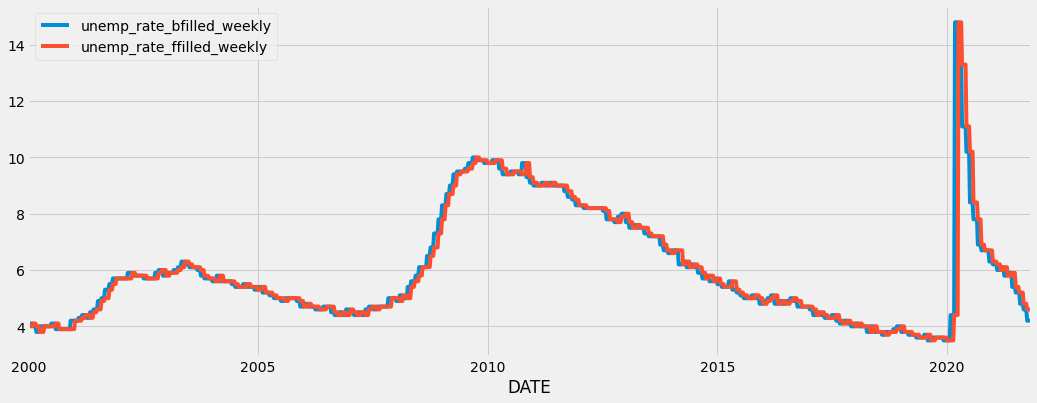

In [80]:
df_unempl_concat.plot(figsize=(16, 6)); plt.show()

## Interpolation

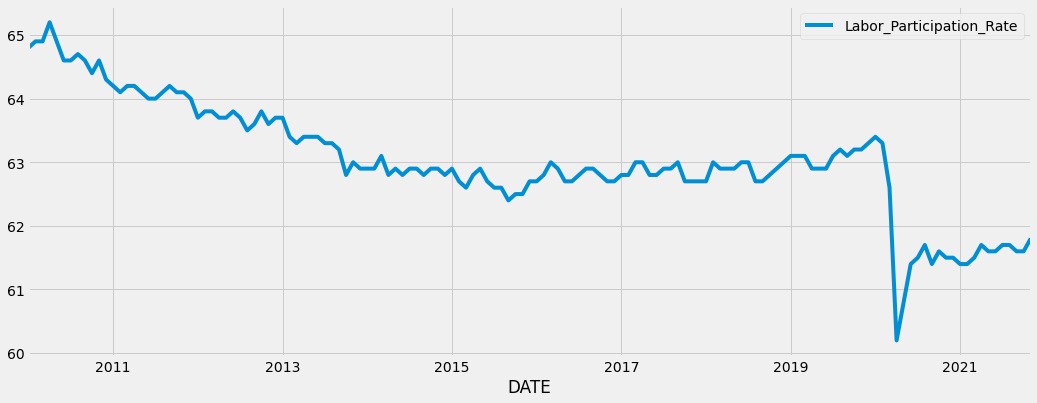

In [81]:
lab_part = pdr.data.DataReader(name='CIVPART', data_source='fred', start = '2010-1-1', end = dt.date.today())
lab_part.columns = ['Labor_Participation_Rate']
lab_part.plot(figsize=(16, 6))
plt.show()

In [82]:
daily_dates = pd.date_range(start=lab_part.index.min(), end=lab_part.index.max(), freq='D')

In [83]:
lab_part_daily = lab_part.reindex(daily_dates)
lab_part_daily['forward_fill'] = lab_part_daily['Labor_Participation_Rate'].ffill()
lab_part_daily['interpolation'] = lab_part_daily['Labor_Participation_Rate'].interpolate() # this is exactly the plot above

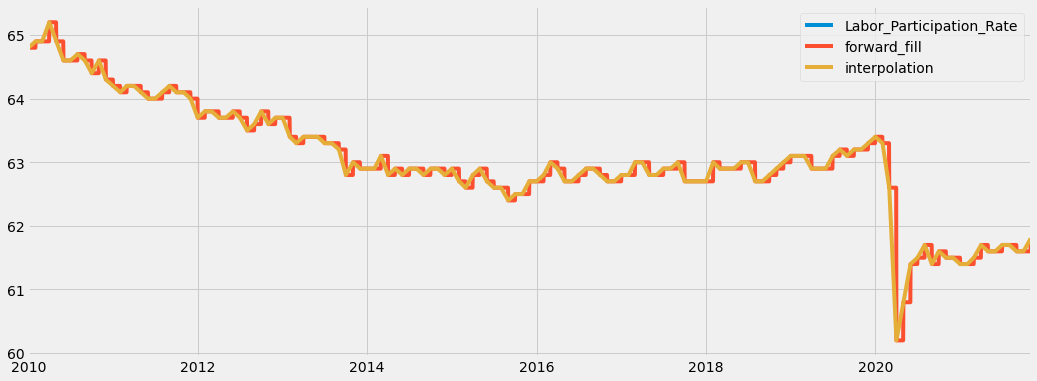

In [84]:
lab_part_daily.plot(figsize=(16, 6)); plt.show()

In [85]:
df = pdr.data.DataReader(name=['DFII10','GOLDAMGBD228NLBM'], data_source='fred', start = '2010-1-1', end = dt.date.today())

In [86]:
df.columns = ['10y_TB_yield','Gold_Fix_London_10AM']

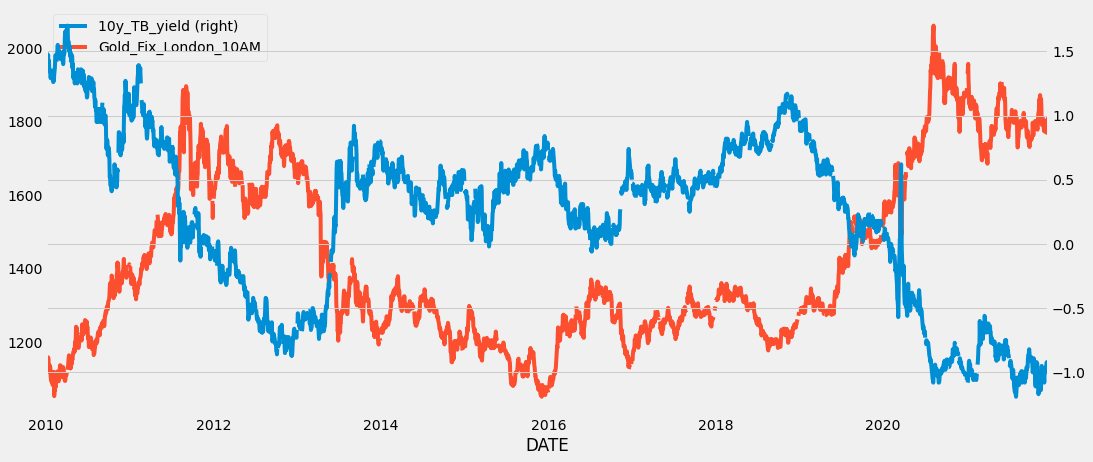

In [87]:
ax = df.plot(secondary_y = '10y_TB_yield', figsize =(16, 7))
plt.show()

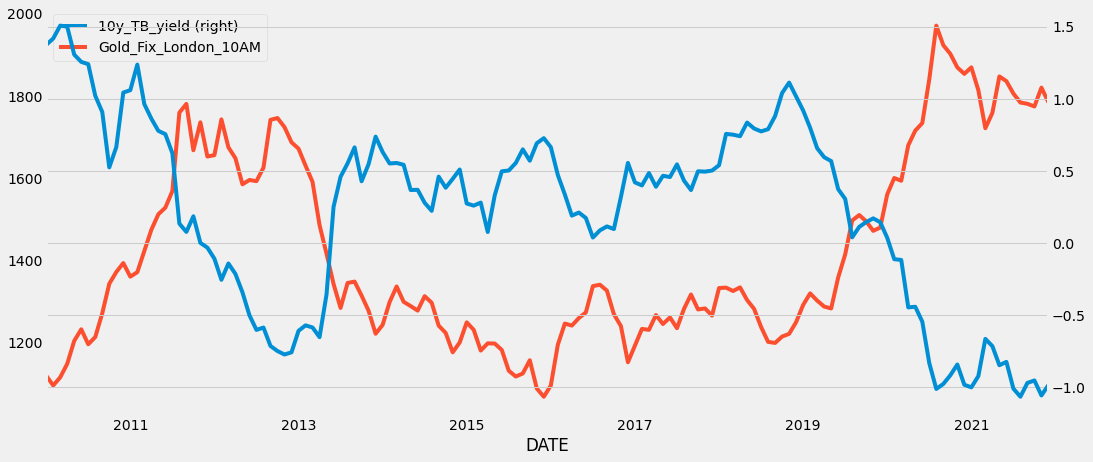

In [88]:
ax = df.resample('M').mean().plot(secondary_y = '10y_TB_yield', figsize =(16, 7))
plt.show()

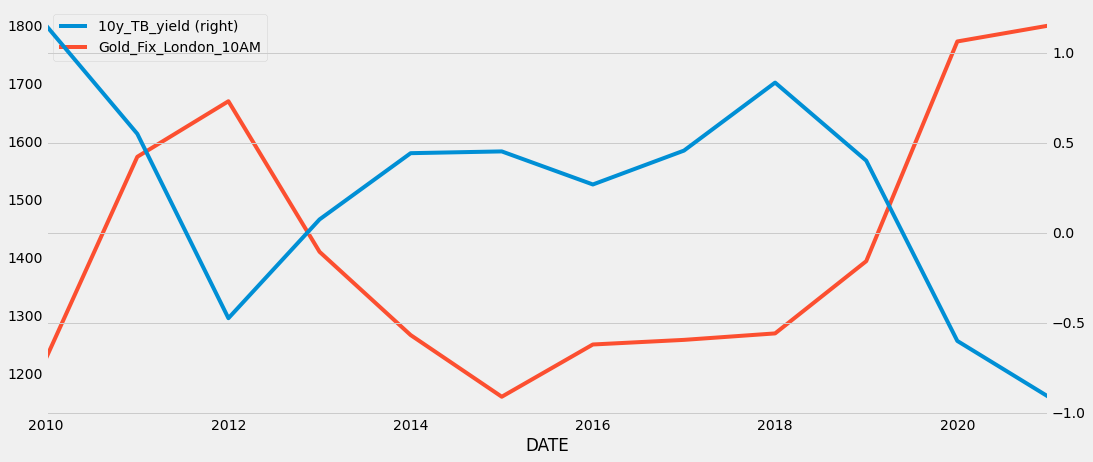

In [89]:
ax = df.resample('A').mean().plot(secondary_y = '10y_TB_yield', figsize =(16, 7))
plt.show()

In [90]:
df.resample('M').first().head()

10y_TB_yield  Gold_Fix_London_10AM
DATE                                          
2010-01-31          1.47               1113.00
2010-02-28          1.29               1082.00
2010-03-31          1.46               1117.25
2010-04-30          1.61               1116.00
2010-05-31          1.32               1184.25

In [91]:
df.resample('M').last().head()

10y_TB_yield  Gold_Fix_London_10AM
DATE                                          
2010-01-31          1.30               1082.75
2010-02-28          1.48               1112.50
2010-03-31          1.60               1109.50
2010-04-30          1.29               1175.25
2010-05-31          1.32               1214.00

## Conform the Frequency Among Time Series

In [92]:
data_list = ['GDPC1', 'SP500', 'U2RATE']
df = pdr.data.DataReader(name=data_list, data_source='fred', start = '2010-1-1', end = '2020-1-1')

In [93]:
df.columns = ['realGDP', 'SP500', 'unempRate']

In [94]:
sp500_chrate_quarterly = df['SP500'].resample('QS').first().pct_change()
unempRate_quarterly = df['unempRate'].resample('QS').first().pct_change()
gdp_chrate = df['realGDP'].dropna().pct_change()

In [95]:
df_quarterly = pd.concat([gdp_chrate, sp500_chrate_quarterly, unempRate_quarterly], axis=1)

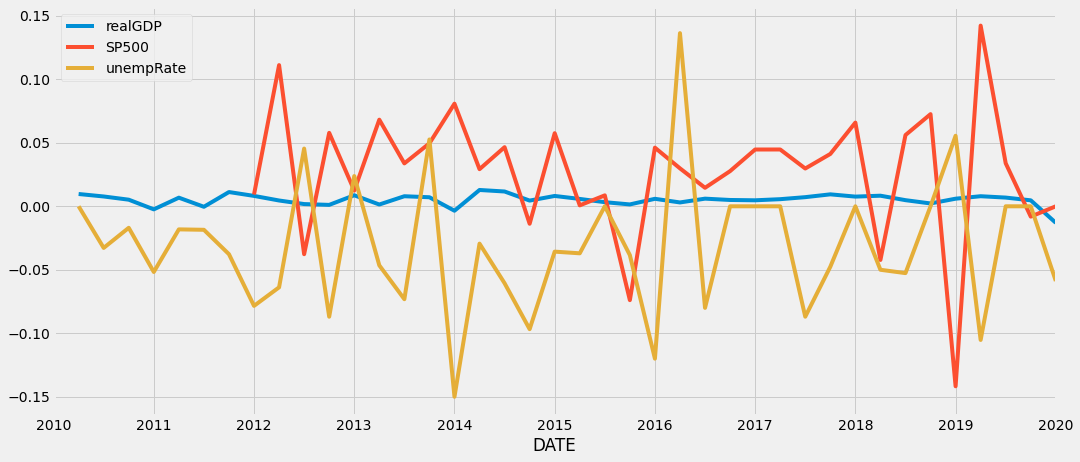

In [96]:
df_quarterly.plot(figsize=(16, 7)); plt.show()

## Apply Multiple Function

In [97]:
nk225 = pdr.data.DataReader(name='NIKKEI225', data_source='fred', start = '2000-1-1', end = dt.datetime.today())

In [98]:
nk225_daily_return = nk225.pct_change()

In [99]:
nk225_stats = nk225_daily_return.resample('W').agg(['mean', 'median', 'std'])

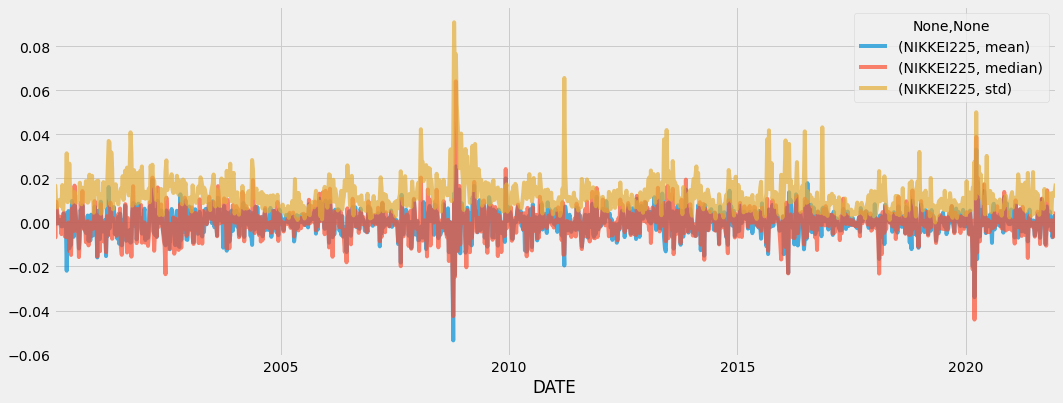

In [100]:
nk225_stats.plot(figsize=(16, 6), alpha=.7); plt.show()

## Rolling Window

In [101]:
start_date = '2010-1-1'
end_date = '2021-12-1'
usdjpy = pdr.data.DataReader(name = 'DEXJPUS', data_source = 'fred', start = start_date, end = end_date).dropna()

In [102]:
usdjpy['30D'] = usdjpy['DEXJPUS'].rolling(window='30D').mean()
usdjpy['60D'] = usdjpy['DEXJPUS'].rolling(window='60D').mean()
usdjpy['120D'] = usdjpy['DEXJPUS'].rolling(window='120D').mean()

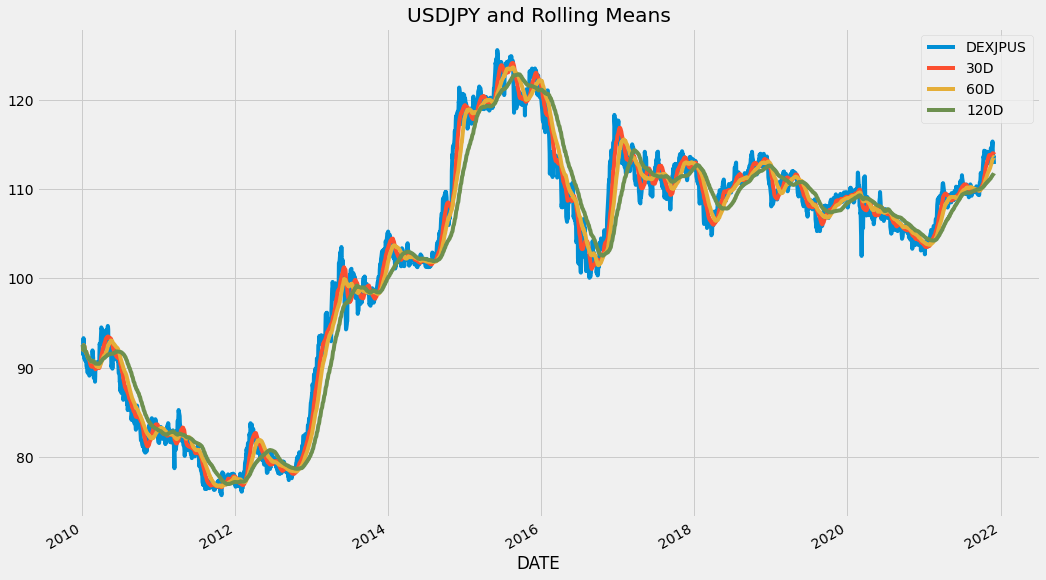

In [103]:
usdjpy.plot(figsize=(16, 10), grid=True, title = 'USDJPY and Rolling Means'); plt.show()

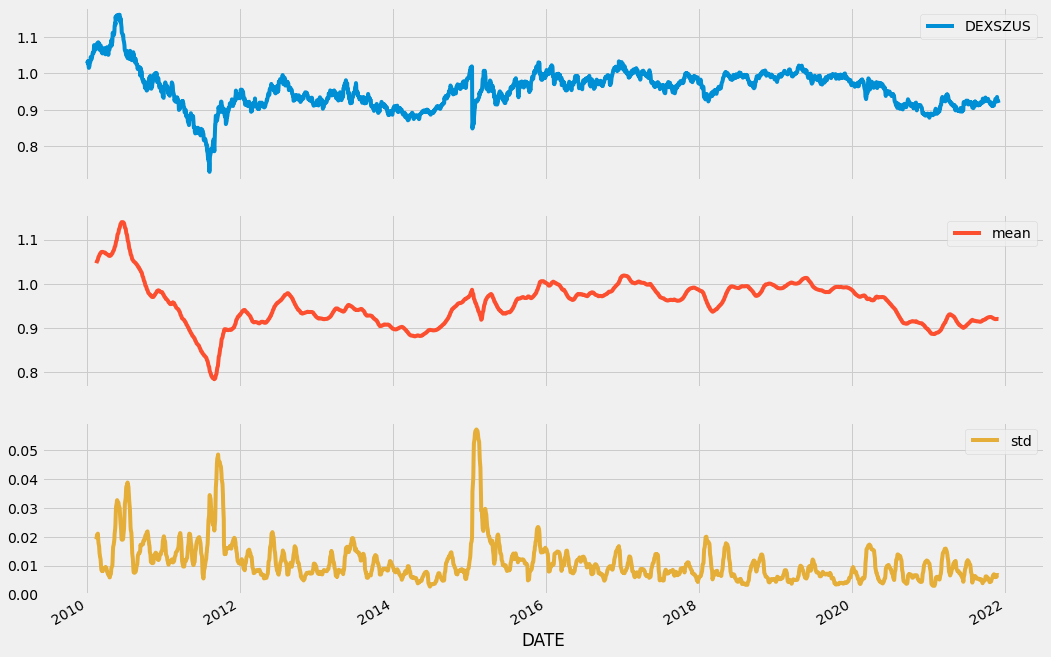

In [104]:
usdchf = pdr.data.DataReader(name = 'DEXSZUS', data_source = 'fred', start = start_date, end = end_date).dropna()
rolling_stats = usdchf['DEXSZUS'].rolling(window=30).agg(['mean', 'std']).dropna()
usdchf = usdchf.join(rolling_stats)
usdchf.plot(subplots=True, figsize=(16, 12), grid=True); plt.show()

## Rolling Window With Upper And Lower Bound

In [105]:
usdjpy['mstd'] = usdjpy['DEXJPUS'].rolling(window=120).std()
usdjpy['ma'] = usdjpy['DEXJPUS'].rolling(window=120).mean()
usdjpy['upper'] = usdjpy['ma'] + usdjpy['mstd']*2
usdjpy['lower'] = usdjpy['ma'] - usdjpy['mstd']*2

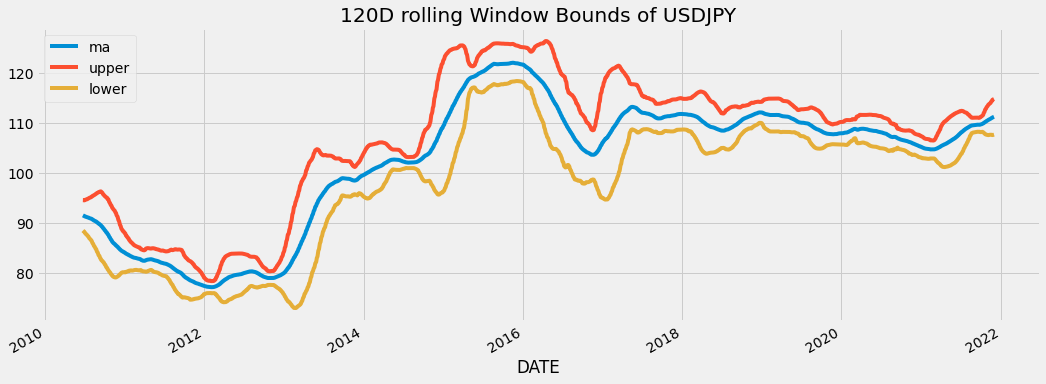

In [106]:
usdjpy.iloc[:, 5:8].plot(figsize=(16, 6), title='120D rolling Window Bounds of USDJPY'); plt.show()

## Rolling Quantile

In [107]:
dxy = pdr.data.DataReader(name = 'DTWEXBGS', data_source = 'fred', start = start_date, end = end_date).dropna()
dxy.columns = ['DXY']
dxy_rolling = dxy['DXY'].rolling(window=30)

dxy['q10'] = dxy_rolling.quantile(.1)
dxy['q50'] = dxy_rolling.quantile(.5)
dxy['q90'] = dxy_rolling.quantile(.9)

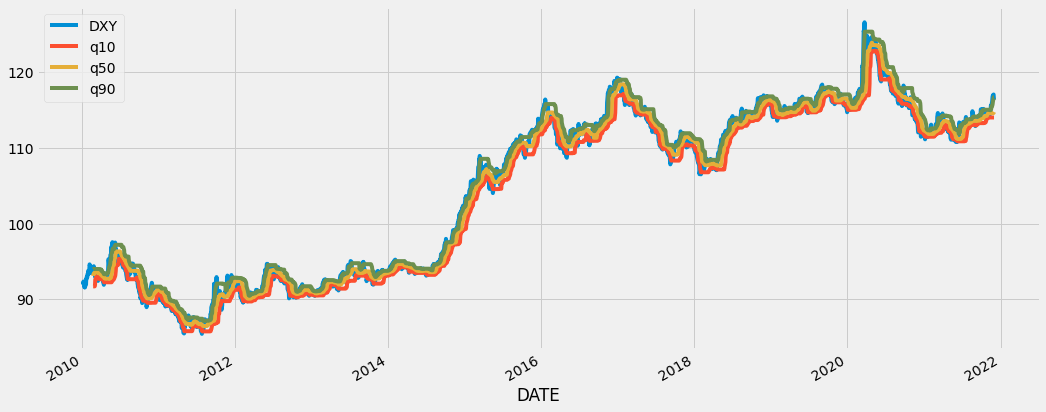

In [108]:
dxy.plot(grid=True, figsize=(16, 7)); plt.show()

## Cumulative Sum

The cumulative summation is the opposite operation of first order difference, but don't do this, they will produce different results.

In [109]:
sp500 = pdr.data.DataReader(name='SP500', data_source='fred', start = '2010-1-1', end = dt.datetime.today())

In [110]:
sp500_diff = sp500.diff().dropna()

In [111]:
first_day = sp500.first('D')
cumulative = first_day.append(sp500_diff).cumsum()

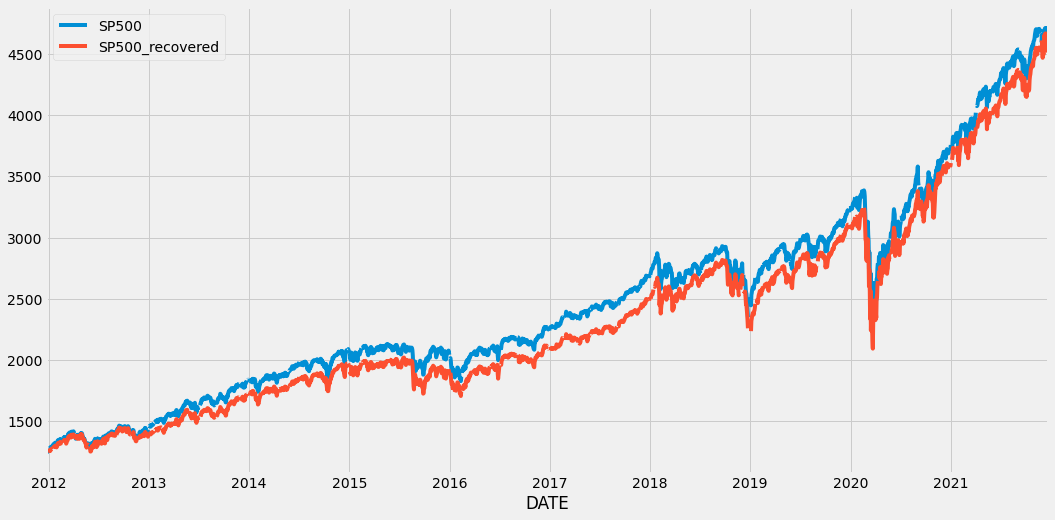

In [112]:
sp500.join(cumulative.add_suffix('_recovered')).plot(figsize=(16, 8), grid=True);plt.show()

## Cumulative Return

In [113]:
init_investment = 50000

Retrieve Lululemon's closing price.

In [114]:
lulu = pdr.data.DataReader(name='LULU', data_source='yahoo', start = '2010-1-1', end = dt.datetime.today())['Close'].to_frame()

In [115]:
lulu_cum_ret = lulu.pct_change().add(1).cumprod()

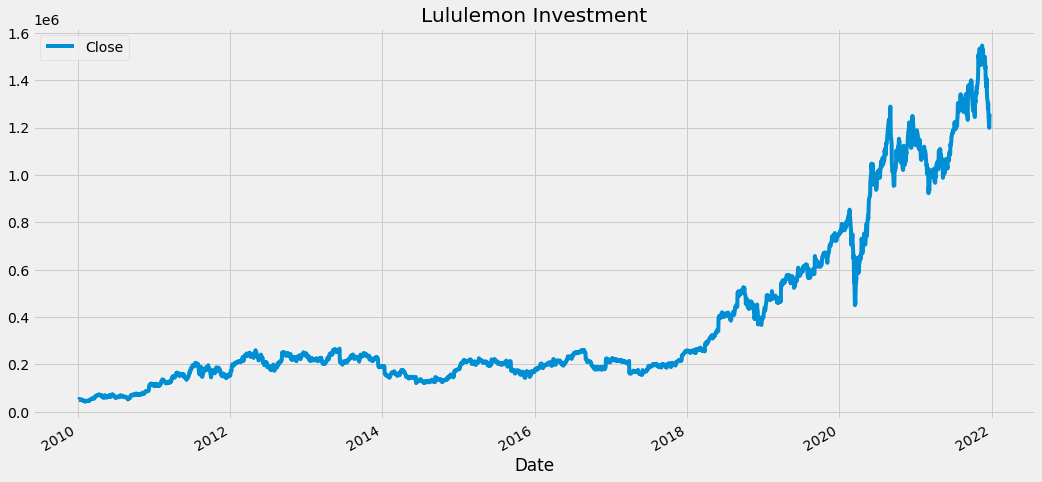

In [116]:
(init_investment*lulu_cum_ret).plot(figsize=(16, 8), grid=True, title='Lululemon Investment');plt.show()

In [117]:
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1

In [118]:
# Lululemon, Nike, Adidas, Under Armour, Anta
stocks_list = ['LULU', 'NKE', 'ADS.F', 'UA', 'AS7.F']
stocks = pdr.data.DataReader(name=stocks_list, data_source='yahoo', start = '2017-1-1', end = dt.datetime.today())['Close']
stocks.columns = ['Lululemon', 'Nike', 'Adidas', 'Under Armour', 'Anta']

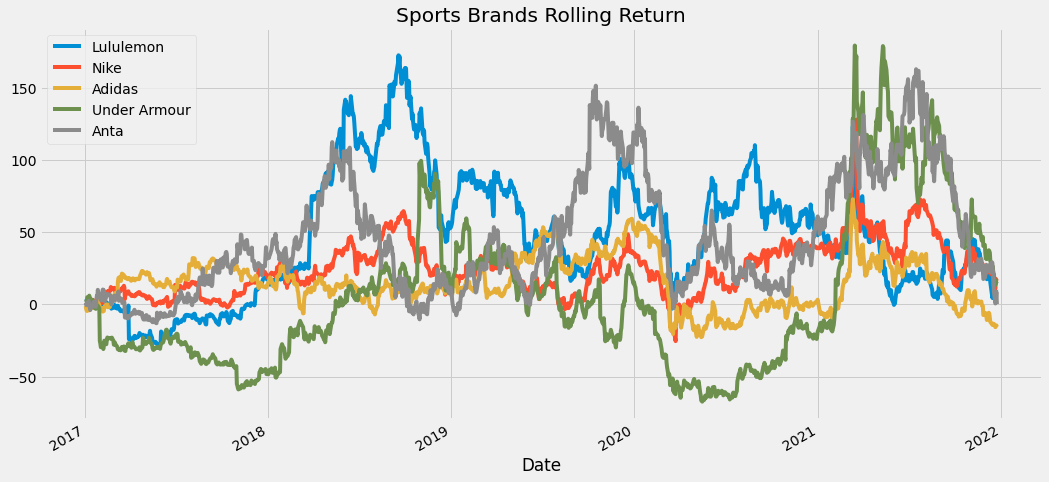

In [119]:
stocks.pct_change().rolling(window='360D')\
.apply(multi_period_return).mul(100).plot(figsize=(16, 8), grid=True, title='Sports Brands Rolling Return')
plt.show()

## Simulating Stocks Growth

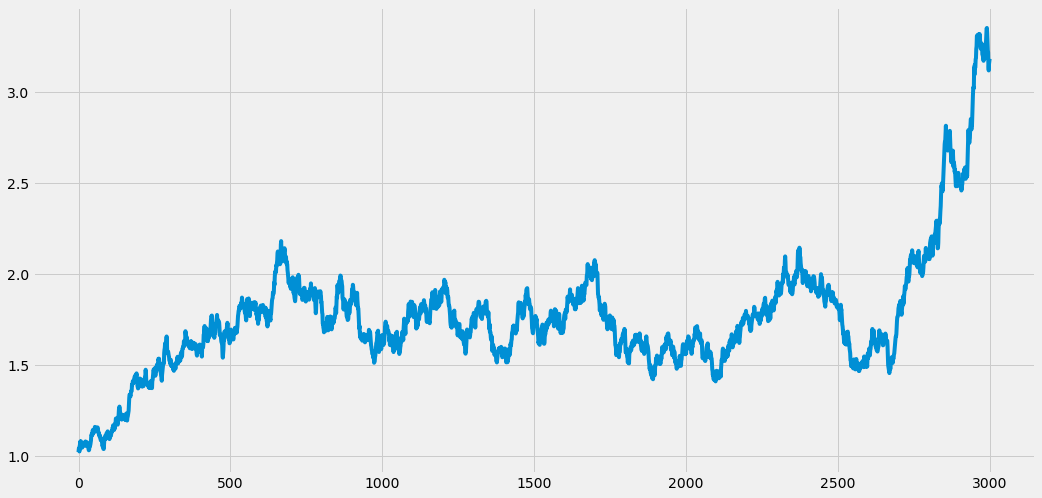

In [120]:
rand_walk = pd.Series(sp.stats.norm.rvs(loc = .0005, scale = .012, size = 3000))
(1 + rand_walk).cumprod().plot(figsize=(16, 8), grid=True);plt.show()

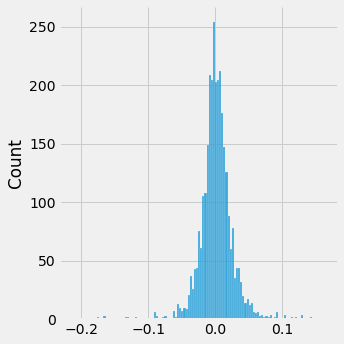

In [121]:
lulu = pdr.data.DataReader(name='LULU', data_source='yahoo', start = '2010-1-1', end = dt.datetime.today())['Close'].to_frame()
daily_lulu = lulu.pct_change().dropna()
lulu_simu = pd.Series(np.random.choice(daily_lulu.values.flatten(), len(daily_lulu)))
sns.displot(lulu_simu); plt.show()

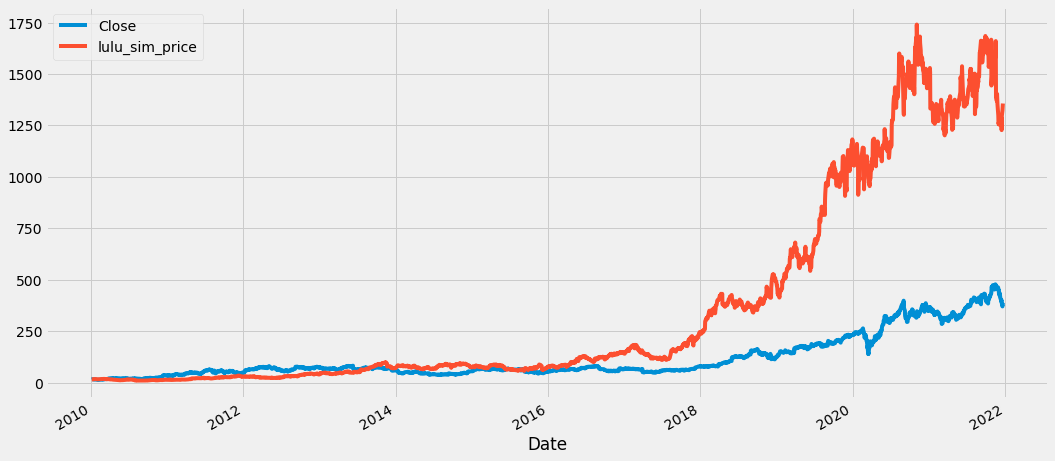

In [122]:
first = lulu['Close'].first('D')
ts_holder = first.append(1 + lulu_simu) #ts_holder time series holder, temp variable holder
ts_holder = ts_holder.cumprod()
ts_holder.index = lulu.index
lulu['lulu_sim_price'] = ts_holder
lulu.plot(figsize=(16, 8), grid=True);plt.show()

## Listings Example

In [123]:
nasdaq = pd.read_excel('listings_info.xlsx', sheet_name='nasdaq', na_values=True)

In [124]:
nasdaq.head()

Stock Symbol           Company Name  Last Sale  Market Capitalization  \
0         AAPL             Apple Inc.     141.05           7.400245e+11   
1        GOOGL          Alphabet Inc.     840.18           5.809175e+11   
2         GOOG          Alphabet Inc.     823.56           5.694261e+11   
3         MSFT  Microsoft Corporation      64.95           5.019031e+11   
4         AMZN       Amazon.com, Inc.     884.67           4.221385e+11   

   IPO Year             Sector  \
0    1980.0         Technology   
1       NaN         Technology   
2    2004.0         Technology   
3    1986.0         Technology   
4    1997.0  Consumer Services   

                                          Industry  
0                           Computer Manufacturing  
1  Computer Software: Programming, Data Processing  
2  Computer Software: Programming, Data Processing  
3          Computer Software: Prepackaged Software  
4                   Catalog/Specialty Distribution

In [125]:
nasdaq.set_index('Stock Symbol', inplace=True)

In [126]:
nasdaq.dropna(subset=['Sector'], inplace=True) # remove companies without sector info

In [127]:
nasdaq['Market Capitalization']/=1e6

In [128]:
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2767 entries, AAPL to ZIONZ
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           2767 non-null   object 
 1   Last Sale              2764 non-null   float64
 2   Market Capitalization  2767 non-null   float64
 3   IPO Year               1337 non-null   float64
 4   Sector                 2767 non-null   object 
 5   Industry               2767 non-null   object 
dtypes: float64(3), object(3)
memory usage: 151.3+ KB


In [129]:
top_comp = nasdaq.groupby(['Sector'])['Market Capitalization'].nlargest(1).sort_values(ascending=False)
top_comp

Sector                 Stock Symbol
Technology             AAPL            740024.467000
Consumer Services      AMZN            422138.530626
Health Care            AMGN            118927.210535
Consumer Non-Durables  KHC             111367.949216
Miscellaneous          PCLN             85496.045967
Public Utilities       TMUS             52930.713577
Capital Goods          TSLA             49614.832848
Transportation         CSX              43005.669415
Finance                CME              39372.418940
Consumer Durables      CPRT             13620.922869
Energy                 FANG              9468.718827
Basic Industries       STLD              7976.835456
Name: Market Capitalization, dtype: float64

In [130]:
tickers = top_comp.index.get_level_values(1) # use 0, 1...any integer to refer to the level of indices
tickers = tickers.tolist()
tickers

['AAPL',
 'AMZN',
 'AMGN',
 'KHC',
 'PCLN',
 'TMUS',
 'TSLA',
 'CSX',
 'CME',
 'CPRT',
 'FANG',
 'STLD']

In [131]:
columns = ['Company Name', 'Market Capitalization', 'Last Sale']
comp_info = nasdaq.loc[tickers, columns].sort_values(by='Market Capitalization', ascending=False)
comp_info['no_share'] = comp_info['Market Capitalization']/comp_info['Last Sale']
comp_info.dtypes

Company Name              object
Market Capitalization    float64
Last Sale                float64
no_share                 float64
dtype: object

In [132]:
comp_info

Company Name  Market Capitalization  Last Sale  \
Stock Symbol                                                                
AAPL                         Apple Inc.          740024.467000     141.05   
AMZN                   Amazon.com, Inc.          422138.530626     884.67   
AMGN                         Amgen Inc.          118927.210535     161.61   
KHC             The Kraft Heinz Company          111367.949216      91.50   
PCLN          The Priceline Group Inc.            85496.045967    1738.77   
TMUS                  T-Mobile US, Inc.           52930.713577      64.04   
TSLA                       Tesla, Inc.            49614.832848     304.00   
CSX                     CSX Corporation           43005.669415      46.42   
CME                      CME Group Inc.           39372.418940     115.87   
CPRT                       Copart, Inc.           13620.922869      29.65   
FANG           Diamondback Energy, Inc.            9468.718827     105.04   
STLD               Steel Dynamics, Inc.            7976.835456      32.91   

                 no_share  
Stock Symbol               
AAPL          5246.540000  
AMZN           477.170618  
AMGN           735.890171  
KHC           1217.136057  
PCLN            49.170417  
TMUS           826.525821  
TSLA           163.206687  
CSX            926.446993  
CME            339.798213  
CPRT           459.390316  
FANG            90.143934  
STLD           242.383332

In [133]:
stocks = pdr.data.DataReader(name=tickers, 
                             data_source='yahoo', 
                             start = '2000-1-1', 
                             end = dt.datetime.today())['Close']

In [134]:
stocks.head()

Symbols         AAPL     AMZN     AMGN  KHC  TMUS  TSLA       CSX  CME  \
Date                                                                     
2000-01-03  0.999442  89.3750  62.9375  NaN   NaN   NaN  1.718750  NaN   
2000-01-04  0.915179  81.9375  58.1250  NaN   NaN   NaN  1.666667  NaN   
2000-01-05  0.928571  69.7500  60.1250  NaN   NaN   NaN  1.701389  NaN   
2000-01-06  0.848214  65.5625  61.1250  NaN   NaN   NaN  1.777778  NaN   
2000-01-07  0.888393  69.5625  68.0000  NaN   NaN   NaN  1.777778  NaN   

Symbols         CPRT  FANG      STLD  PCLN  
Date                                        
2000-01-03  3.250000   NaN  3.984375   NaN  
2000-01-04  2.843750   NaN  3.765625   NaN  
2000-01-05  2.822917   NaN  4.046875   NaN  
2000-01-06  2.625000   NaN  4.093750   NaN  
2000-01-07  2.927083   NaN  4.234375   NaN

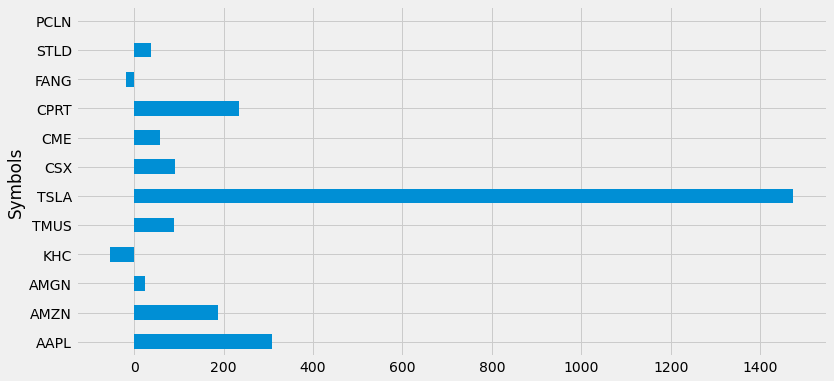

In [135]:
returns = (stocks.iloc[-1]/stocks.loc['2018-1-2']-1)*100
returns.plot(kind='barh', figsize = (12, 6), grid=True)
plt.show()

## Group By Month

In [136]:
stock_index = pdr.data.DataReader(name=['SP500', 'NIKKEI225', 'NASDAQCOM'], data_source='fred', start = '2001-1-1', end = dt.datetime.today())

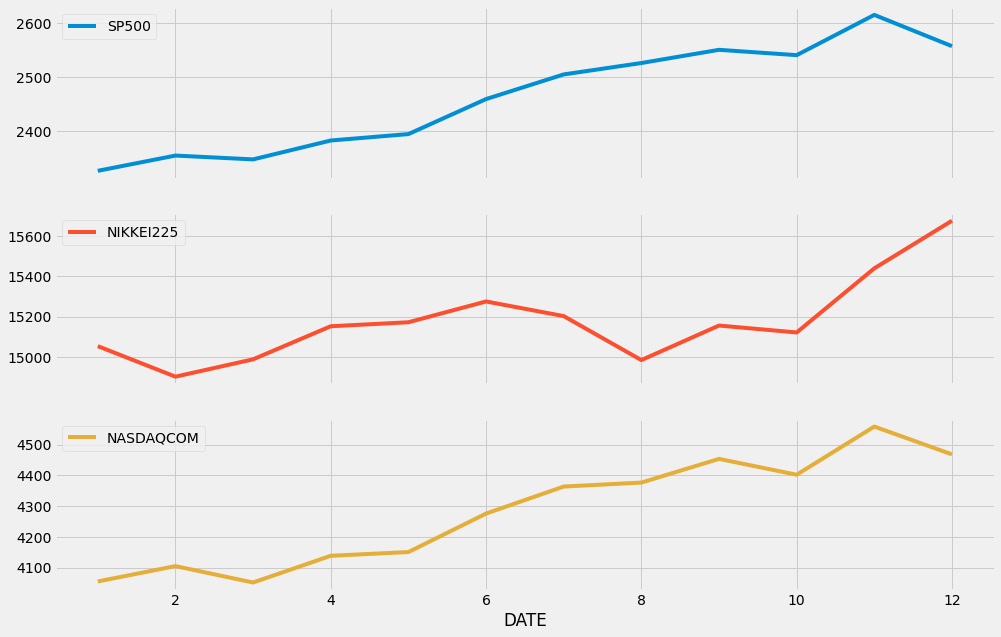

In [137]:
stock_index.groupby(stock_index.index.month).mean().plot(subplots=True, figsize=(15, 10)); plt.show()

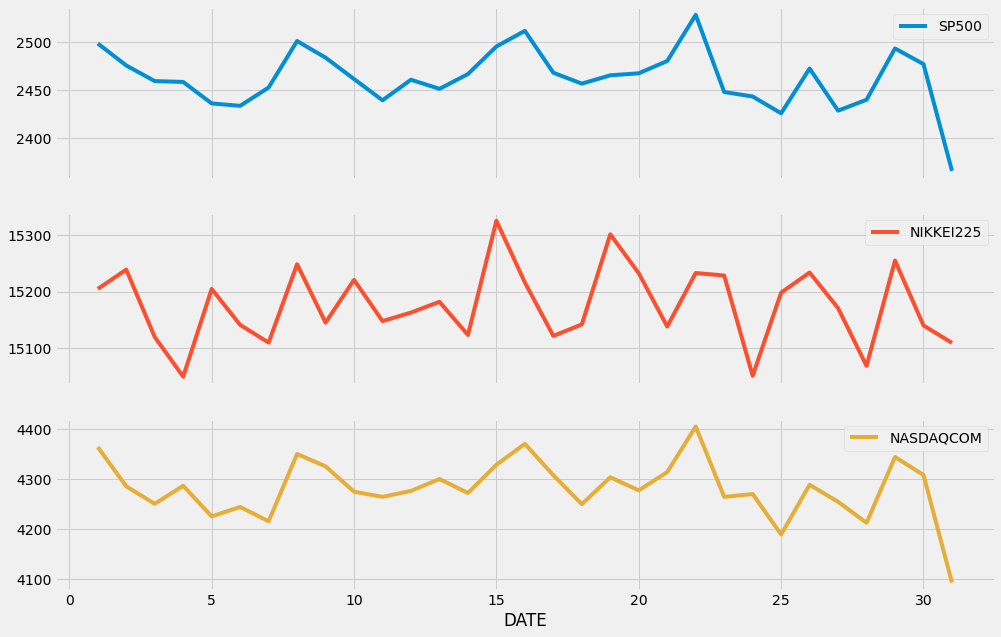

In [138]:
stock_index.groupby(stock_index.index.day).mean().plot(subplots=True, figsize=(15, 10)); plt.show()

## Boxplot

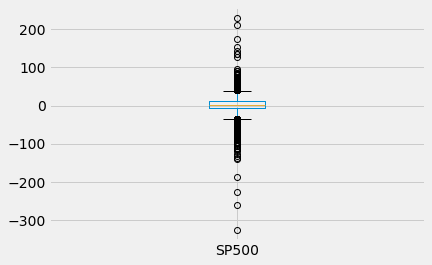

In [139]:
stock_index[['SP500']].diff().boxplot();plt.show()

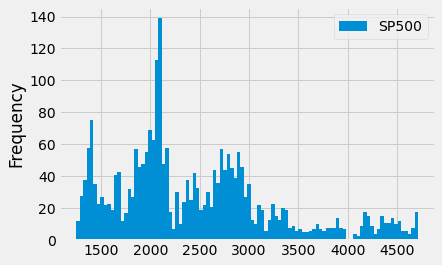

In [140]:
stock_index[['SP500']].plot(kind='hist', bins=100);plt.show()

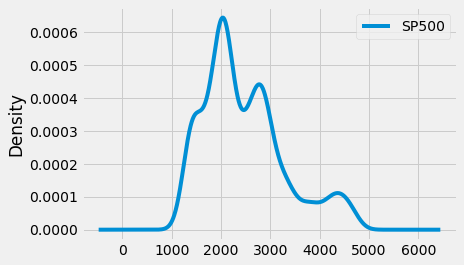

In [141]:
stock_index[['SP500']].plot(kind='density');plt.show()

## Plotting Autocorrelation

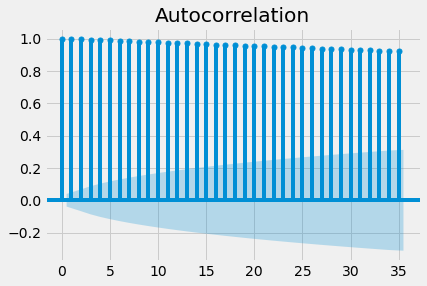

In [142]:
fig = tsaplots.plot_acf(stock_index['SP500'].dropna())

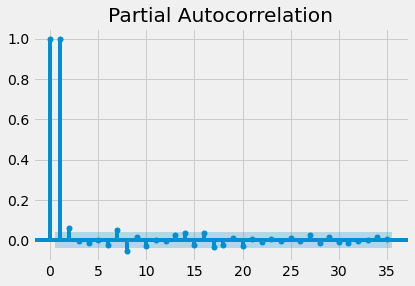

In [143]:
fig = tsaplots.plot_pacf(stock_index['SP500'].dropna())

## Decomposition

In [144]:
tot_constr_China = pdr.data.DataReader(name=['CHNPRCNTO01MLQ'], data_source='fred', start = '2001-1-1', end = dt.datetime.today())
tot_constr_China.columns = ['constru_data']

In [145]:
decomp = sm.tsa.seasonal_decompose(tot_constr_China['constru_data'])

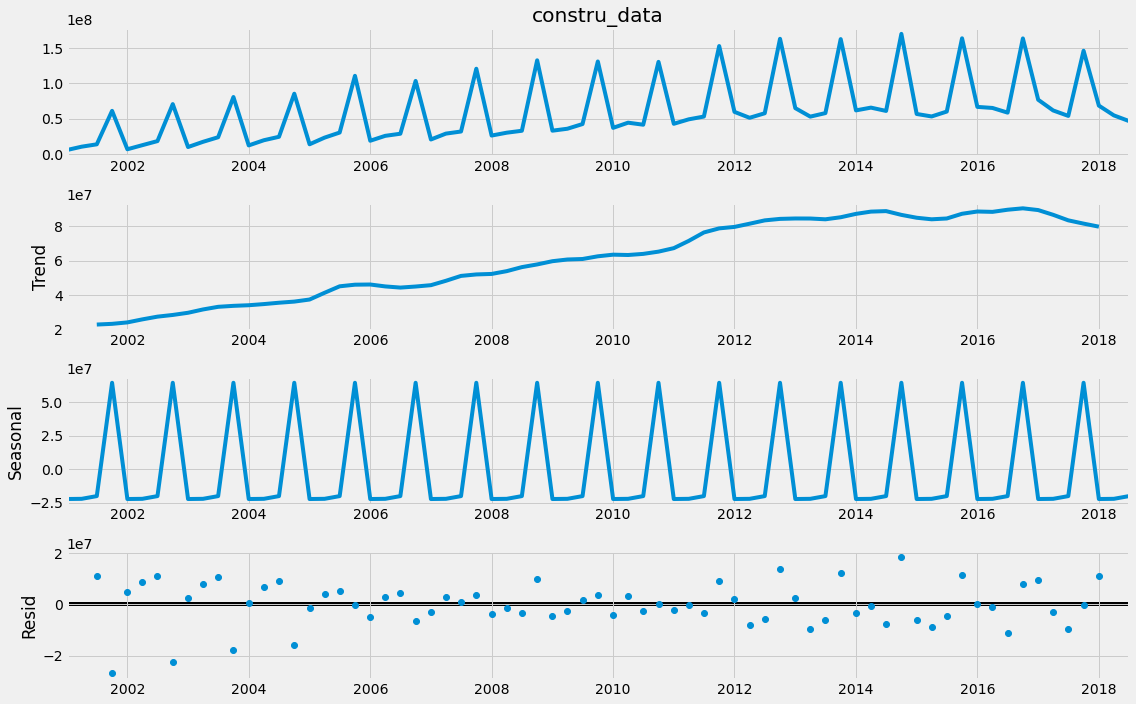

In [146]:
plt.rcParams['figure.figsize'] = 16, 10
fig = decomp.plot()

## Area Plot

In [147]:
df = pdr.data.DataReader(name=['PCE','W068RCQ027SBEA','BOPGSTB'], data_source='fred', start = '2001-1-1', end = dt.datetime.today())
df.columns = ['PCE', 'Gov_Exp', 'Trade_Ba']
df['Trade_Ba'] = df['Trade_Ba']/1000 # convert to billion unit
df['Gov_Exp'] = df['Gov_Exp'].interpolate()

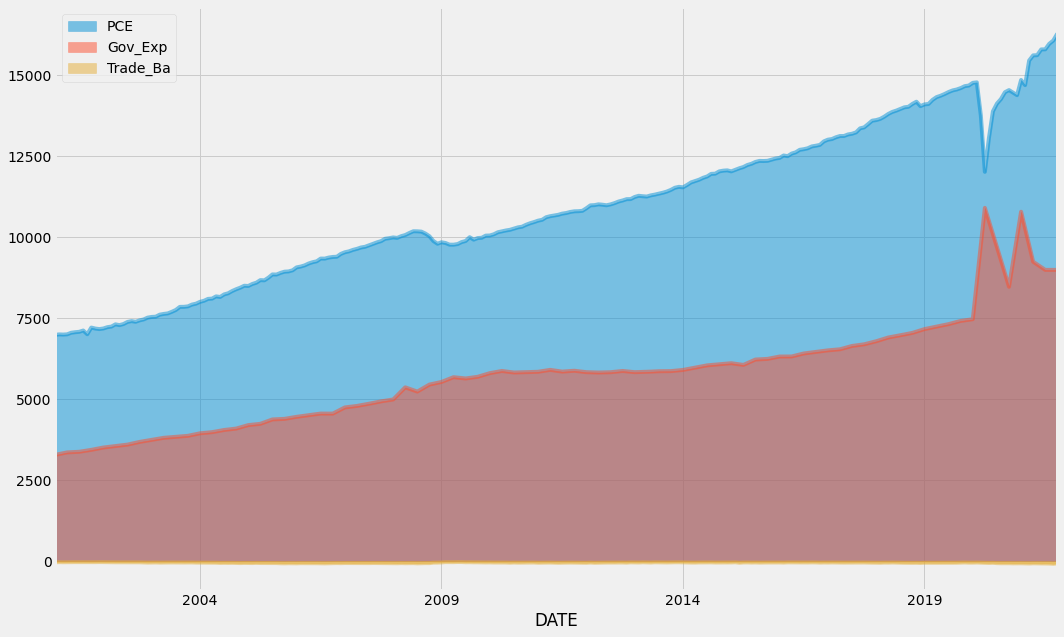

In [148]:
df.plot.area(stacked=False); plt.show()

## Adding Summary Statistics

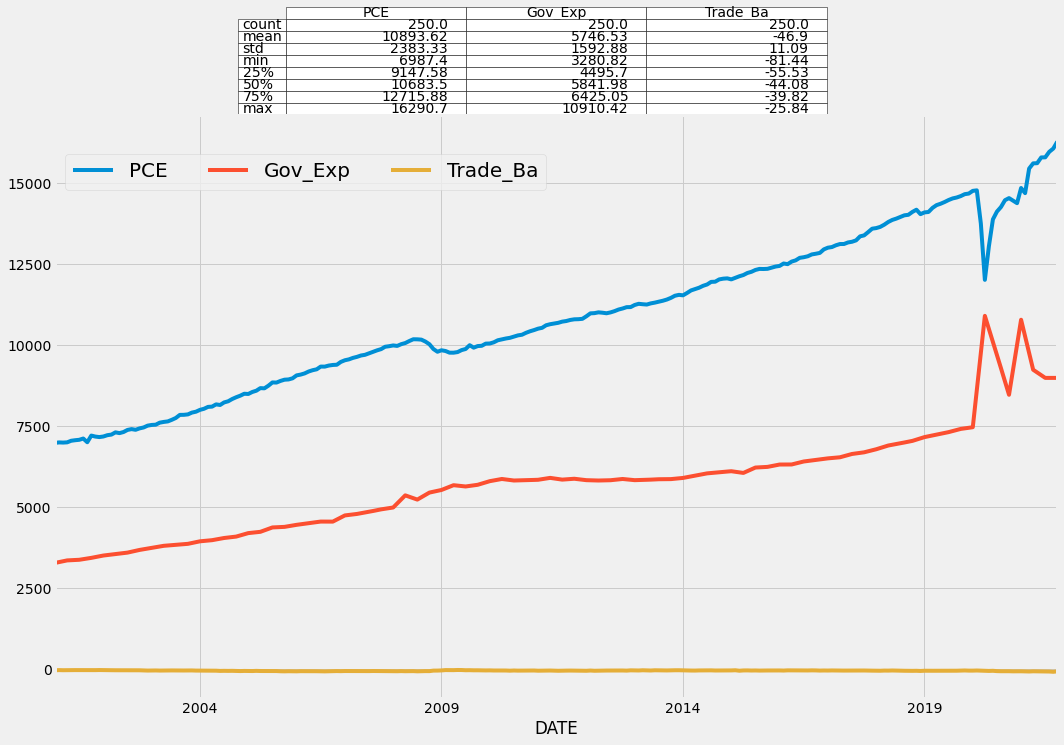

In [149]:
ax = df.plot()
df_summary = df.describe() 

ax.table(cellText=np.round(df_summary.values, 2),
         colWidths = [0.18]*len(df_summary.columns),
         rowLabels=df_summary.index,
         colLabels=df_summary.columns,
         loc='top')
ax.legend(loc='best', bbox_to_anchor=(.5, .95), ncol=3, fontsize=20)
plt.show()